<a href="https://colab.research.google.com/github/Manju-5/Assignment/blob/main/Car%20insurance%20claim%20Project(Part%202%20-final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Insurance claim prediction**

Problem statement : The project discussed here is to implement data analysis tools and techniques and predict whether an insured car will file a claim or not which is a classification prediction.

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.figure_factory as ff
import plotly.express as px

#To ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('car_insurance_claim.csv') # reading the dataset
data

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,...,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,...,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,...,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,67790126,1,13AUG54,45.0,2,9.0,"$164,669",No,"$386,273",Yes,...,Minivan,no,$0,0,No,2,$0,17.0,0,Highly Urban/ Urban
10298,61970712,0,17JUN53,46.0,0,9.0,"$107,204",No,"$332,591",Yes,...,Panel Truck,no,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
10299,849208064,0,18JUN51,48.0,0,15.0,"$39,837",No,"$170,611",Yes,...,z_SUV,no,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
10300,627828331,0,12DEC48,50.0,0,7.0,"$43,445",No,"$149,248",Yes,...,Minivan,no,$0,0,No,0,$0,11.0,0,Highly Urban/ Urban


In [ ]:
data.drop(['ID'],inplace=True,axis=1)
data.head()

,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,M,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,...,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,M,...,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,...,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,M,...,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban


In [ ]:
data['index'] = range(1, len(data) + 1)
data.head()

,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY,index
0,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,M,...,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban,1
1,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,...,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban,2
2,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,M,...,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban,3
3,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,...,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban,4
4,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,M,...,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban,5


In [ ]:
data.set_index('index', inplace=True)
data

,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
index,,,,,,,,,,,,,,,,,,,,,
1,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,M,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
2,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,...,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
3,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,M,...,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
4,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,...,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
5,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,M,...,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10298,1,13AUG54,45.0,2,9.0,"$164,669",No,"$386,273",Yes,M,...,Minivan,no,$0,0,No,2,$0,17.0,0,Highly Urban/ Urban
10299,0,17JUN53,46.0,0,9.0,"$107,204",No,"$332,591",Yes,M,...,Panel Truck,no,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
10300,0,18JUN51,48.0,0,15.0,"$39,837",No,"$170,611",Yes,z_F,...,z_SUV,no,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban


In [ ]:
data.shape

(10302, 26)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10302 entries, 1 to 10302
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KIDSDRIV    10302 non-null  int64  
 1   BIRTH       10302 non-null  object 
 2   AGE         10295 non-null  float64
 3   HOMEKIDS    10302 non-null  int64  
 4   YOJ         9754 non-null   float64
 5   INCOME      9732 non-null   object 
 6   PARENT1     10302 non-null  object 
 7   HOME_VAL    9727 non-null   object 
 8   MSTATUS     10302 non-null  object 
 9   GENDER      10302 non-null  object 
 10  EDUCATION   10302 non-null  object 
 11  OCCUPATION  9637 non-null   object 
 12  TRAVTIME    10302 non-null  int64  
 13  CAR_USE     10302 non-null  object 
 14  BLUEBOOK    10302 non-null  object 
 15  TIF         10302 non-null  int64  
 16  CAR_TYPE    10302 non-null  object 
 17  RED_CAR     10302 non-null  object 
 18  OLDCLAIM    10302 non-null  object 
 19  CLM_FREQ    10302 non-nul

In [ ]:
data.dtypes

KIDSDRIV        int64
BIRTH          object
AGE           float64
HOMEKIDS        int64
YOJ           float64
INCOME         object
PARENT1        object
HOME_VAL       object
MSTATUS        object
GENDER         object
EDUCATION      object
OCCUPATION     object
TRAVTIME        int64
CAR_USE        object
BLUEBOOK       object
TIF             int64
CAR_TYPE       object
RED_CAR        object
OLDCLAIM       object
CLM_FREQ        int64
REVOKED        object
MVR_PTS         int64
CLM_AMT        object
CAR_AGE       float64
CLAIM_FLAG      int64
URBANICITY     object
dtype: object

Note: From the above output, we see that the data type of 'INCOME', 'HOME_VAL', 'BLUEBOOK''OLDCLAIM' and 'CLM_AMT' is 'object'. But according to data definition, they are numerical variables, which are wrongly interpreted as 'object', so we will convert these variables data type to 'float64'.

In [ ]:
# replacing $ , etc symbol

columns = ['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT']

for col in columns:
    data[col].replace({'\$': '', ',': ''}, regex=True,inplace=True)

In [ ]:
# convering the wrongly given column dtypes to the right ones
columns = ['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT']
for col in columns:
    data[col] = data[col].astype(float)

In [ ]:
data.dtypes

KIDSDRIV        int64
BIRTH          object
AGE           float64
HOMEKIDS        int64
YOJ           float64
INCOME        float64
PARENT1        object
HOME_VAL      float64
MSTATUS        object
GENDER         object
EDUCATION      object
OCCUPATION     object
TRAVTIME        int64
CAR_USE        object
BLUEBOOK      float64
TIF             int64
CAR_TYPE       object
RED_CAR        object
OLDCLAIM      float64
CLM_FREQ        int64
REVOKED        object
MVR_PTS         int64
CLM_AMT       float64
CAR_AGE       float64
CLAIM_FLAG      int64
URBANICITY     object
dtype: object

In [ ]:
data.columns

Index(['KIDSDRIV', 'BIRTH', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'PARENT1',
       'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'TRAVTIME',
       'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM',
       'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE', 'CLAIM_FLAG',
       'URBANICITY'],
      dtype='object')

Summary statistics of the data

In [ ]:
# 1. Numerical data
data.describe()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
count,10302.000000,10295.000000,10302.000000,9754.000000,9732.000000,9727.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,9663.000000,10302.000000
mean,0.169288,44.837397,0.720443,10.474062,61572.073263,154523.018608,33.416424,15659.923316,5.329159,4033.977868,0.800718,1.710153,1511.266453,8.298148,0.266550
std,0.506512,8.606445,1.116323,4.108943,47457.202749,129188.439405,15.869687,8428.765264,4.110795,8733.143119,1.154079,2.159015,4725.249896,5.714450,0.442177
min,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,0.000000
25%,0.000000,39.000000,0.000000,9.000000,27584.000000,0.000000,22.000000,9200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,45.000000,0.000000,11.000000,53529.000000,160661.000000,33.000000,14400.000000,4.000000,0.000000,0.000000,1.000000,0.000000,8.000000,0.000000
75%,0.000000,51.000000,1.000000,13.000000,86166.000000,238256.000000,44.000000,20890.000000,7.000000,4647.500000,2.000000,3.000000,1144.750000,12.000000,1.000000
max,4.000000,81.000000,5.000000,23.000000,367030.000000,885282.000000,142.000000,69740.000000,25.000000,57037.000000,5.000000,13.000000,123247.000000,28.000000,1.000000


The above output illustrates the summary statistics of all the numeric variables like the mean, median(50%), minimum, and maximum values, along with the standard deviation. Note, the average age of a driver is 44 years. Average income is 61572. The amount claimed is in between 4725 to 123247.

In [ ]:
# 2. Categorical variable
data.describe(include=object)

,BIRTH,PARENT1,MSTATUS,GENDER,EDUCATION,OCCUPATION,CAR_USE,CAR_TYPE,RED_CAR,REVOKED,URBANICITY
count,10302,10302,10302,10302,10302,9637,10302,10302,10302,10302,10302
unique,6560,2,2,2,5,8,2,6,2,2,2
top,20OCT60,No,Yes,z_F,z_High School,z_Blue Collar,Private,z_SUV,no,No,Highly Urban/ Urban
freq,8,8959,6188,5545,2952,2288,6513,2883,7326,9041,8230


In [ ]:
# Checking unique value
uniq= pd.DataFrame(data.nunique(),columns=['Unique Values'])
uniq

,Unique Values
KIDSDRIV,5
BIRTH,6560
AGE,61
HOMEKIDS,6
YOJ,21
INCOME,8151
PARENT1,2
HOME_VAL,6334
MSTATUS,2
GENDER,2


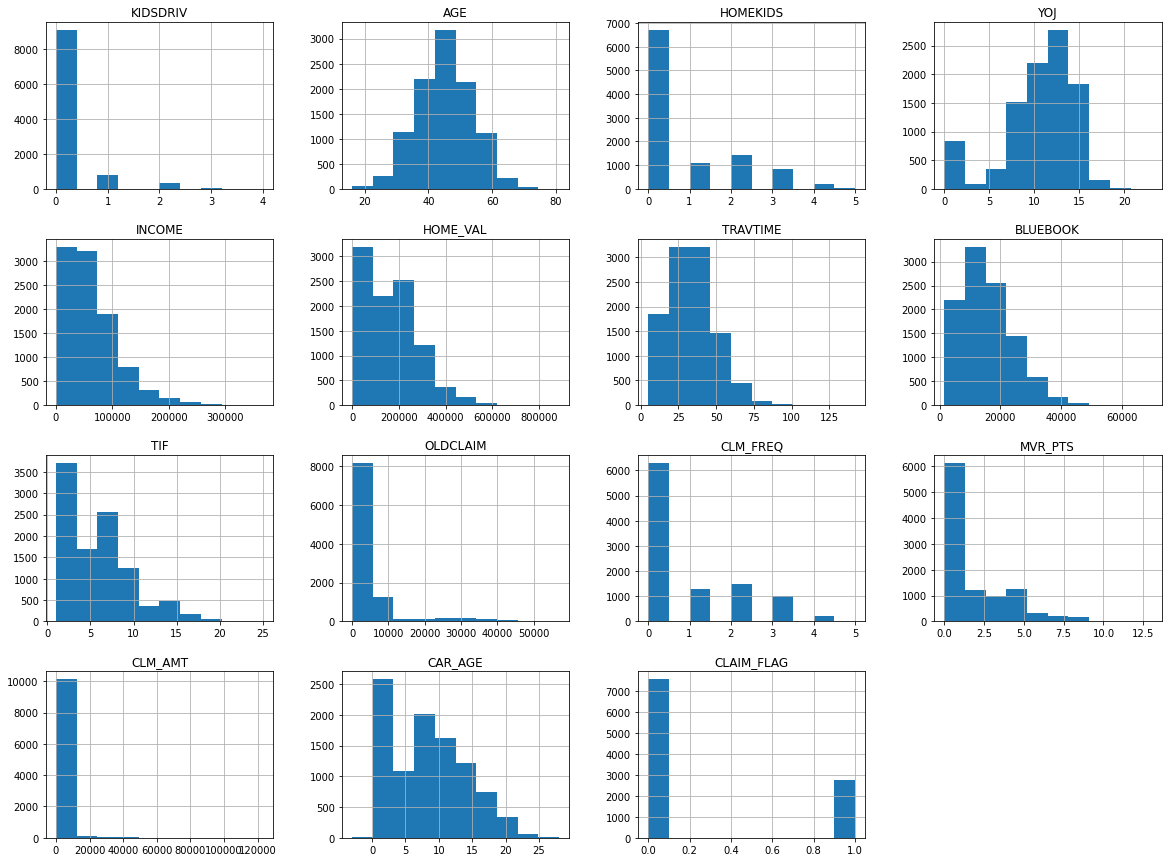

In [ ]:
# Plotting numeric variables
freqgraph=data.select_dtypes(include=['float','int'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [ ]:
# Checking percentage of missing values and plotting it
Total = data.isnull().sum().sort_values(ascending=False) 
Percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])
missing_data

,Total,Percentage of Missing Values
OCCUPATION,665,6.455057
CAR_AGE,639,6.202679
HOME_VAL,575,5.581440
INCOME,570,5.532906
YOJ,548,5.319355
AGE,7,0.067948
KIDSDRIV,0,0.000000
CAR_TYPE,0,0.000000
CLAIM_FLAG,0,0.000000
CLM_AMT,0,0.000000


Missing value is more in occupation category and it accounts around 6%.

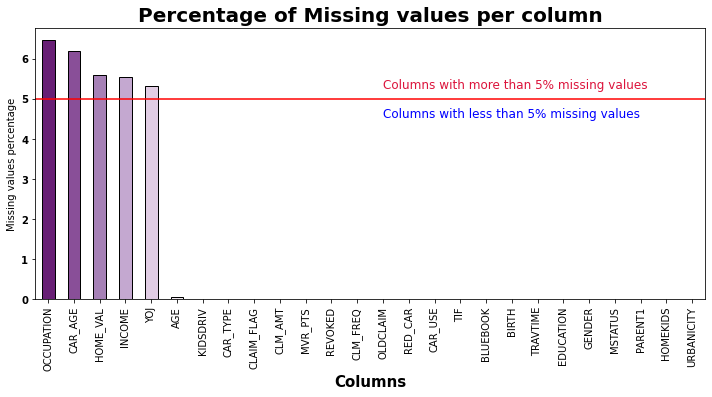

In [ ]:
def msv(data, thresh = 5, color = 'black', edgecolor = 'black', height = 5, width = 12):
    
    plt.figure(figsize = (width, height))
    percentage = (data.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')
    
    plt.title('Percentage of Missing values per column', fontsize=20, weight='bold' )
    
    plt.text(len(data.isnull().sum()/len(data))/2, thresh+0.5, f'Columns with more than {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/2, thresh - 0.2, f'Columns with less than {thresh}% missing values', fontsize=12, color='blue',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight ='bold')
    
    return plt.show()
msv(data, 5, color=sns.color_palette('PRGn',12))

 Visualize Missing Values using Heatmap

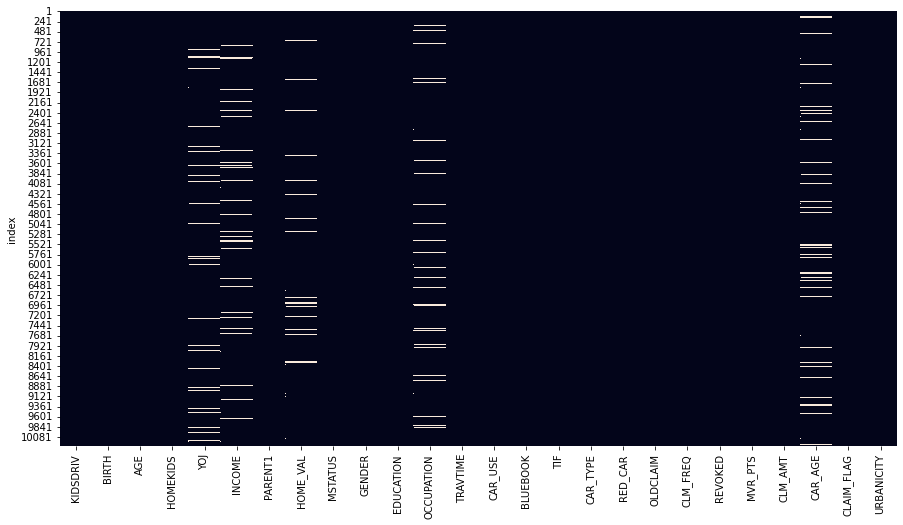

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.isnull(), cbar=False)
plt.show()

In [ ]:
# Replacing special chars in data
data["EDUCATION"].value_counts()

z_High School    2952
Bachelors        2823
Masters          2078
<High School     1515
PhD               934
Name: EDUCATION, dtype: int64

In [ ]:
data.MSTATUS = data.MSTATUS.apply(lambda x: 'No' if x == 'z_No' else x)
data.GENDER = data.GENDER.apply(lambda x: 'F' if x == 'z_F' else x)
data.EDUCATION = data.EDUCATION.apply(lambda x: 'High School' if x == 'z_High School' else x)
data.OCCUPATION = data.OCCUPATION.apply(lambda x: 'Blue Collar' if x == 'z_Blue Collar' else x)
data.CAR_TYPE = data.CAR_TYPE.apply(lambda x: 'SUV' if x == 'z_SUV' else x)
data.URBANICITY = data.URBANICITY.apply(lambda x: 'Highly Rural/ Rural' if x == 'z_Highly Rural/ Rural' else x)

In [ ]:
data['URBANICITY'] = data.URBANICITY.apply(lambda x: x[-5:])

In [ ]:
data["EDUCATION"].value_counts()

High School     2952
Bachelors       2823
Masters         2078
<High School    1515
PhD              934
Name: EDUCATION, dtype: int64

In [ ]:
data.URBANICITY

index
1        Urban
2        Urban
3        Urban
4        Urban
5        Urban
         ...  
10298    Urban
10299    Urban
10300    Urban
10301    Urban
10302    Rural
Name: URBANICITY, Length: 10302, dtype: object

In [ ]:
data.URBANICITY.value_counts()

Urban    8230
Rural    2072
Name: URBANICITY, dtype: int64

In [ ]:
data.CAR_USE.value_counts()

Private       6513
Commercial    3789
Name: CAR_USE, dtype: int64

In [ ]:
data.OCCUPATION.value_counts()

Blue Collar     2288
Clerical        1590
Professional    1408
Manager         1257
Lawyer          1031
Student          899
Home Maker       843
Doctor           321
Name: OCCUPATION, dtype: int64

Filter out only the numeric variables from the dataframe

In [ ]:
numeric_features = data.select_dtypes(include=np.number)
numeric_features.columns

Index(['KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'HOME_VAL', 'TRAVTIME',
       'BLUEBOOK', 'TIF', 'OLDCLAIM', 'CLM_FREQ', 'MVR_PTS', 'CLM_AMT',
       'CAR_AGE', 'CLAIM_FLAG'],
      dtype='object')

The dataframe numeric_features has 15 numeric variables.

 Correlation matrix of numeric variables

In [ ]:
corr =  numeric_features.corr()
corr

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
KIDSDRIV,1.000000,-0.078427,0.463653,0.042971,-0.043217,-0.015447,0.012207,-0.028508,-0.005830,0.023886,0.038952,0.048424,0.068283,-0.059629,0.108421
AGE,-0.078427,1.000000,-0.447787,0.140878,0.186202,0.209600,-0.001569,0.166290,-0.001890,-0.033378,-0.037641,-0.075732,-0.049034,0.178592,-0.106969
HOMEKIDS,0.463653,-0.447787,1.000000,0.077707,-0.160230,-0.107483,-0.000722,-0.108569,0.007509,0.029756,0.038661,0.064294,0.068646,-0.159008,0.123049
YOJ,0.042971,0.140878,0.077707,1.000000,0.293899,0.272198,-0.017152,0.148086,0.023921,-0.005077,-0.023535,-0.041593,-0.026799,0.064685,-0.066265
INCOME,-0.043217,0.186202,-0.160230,0.293899,1.000000,0.578943,-0.051853,0.429095,0.002361,-0.039347,-0.049220,-0.063495,-0.057686,0.417301,-0.142587
HOME_VAL,-0.015447,0.209600,-0.107483,0.272198,0.578943,1.000000,-0.035139,0.261962,0.006768,-0.059803,-0.093854,-0.092460,-0.091987,0.223198,-0.185390
TRAVTIME,0.012207,-0.001569,-0.000722,-0.017152,-0.051853,-0.035139,1.000000,-0.022536,-0.013327,-0.013806,0.008274,0.009694,0.031270,-0.033290,0.053283
BLUEBOOK,-0.028508,0.166290,-0.108569,0.148086,0.429095,0.261962,-0.022536,1.000000,0.000705,-0.030725,-0.042130,-0.044818,-0.002443,0.194366,-0.103287
TIF,-0.005830,-0.001890,0.007509,0.023921,0.002361,0.006768,-0.013327,0.000705,1.000000,-0.015520,-0.017378,-0.031164,-0.046518,0.007897,-0.081225
OLDCLAIM,0.023886,-0.033378,0.029756,-0.005077,-0.039347,-0.059803,-0.013806,-0.030725,-0.015520,1.000000,0.494468,0.262031,0.076535,-0.019163,0.142918


In [ ]:
corr.columns

Index(['KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'HOME_VAL', 'TRAVTIME',
       'BLUEBOOK', 'TIF', 'OLDCLAIM', 'CLM_FREQ', 'MVR_PTS', 'CLM_AMT',
       'CAR_AGE', 'CLAIM_FLAG'],
      dtype='object')

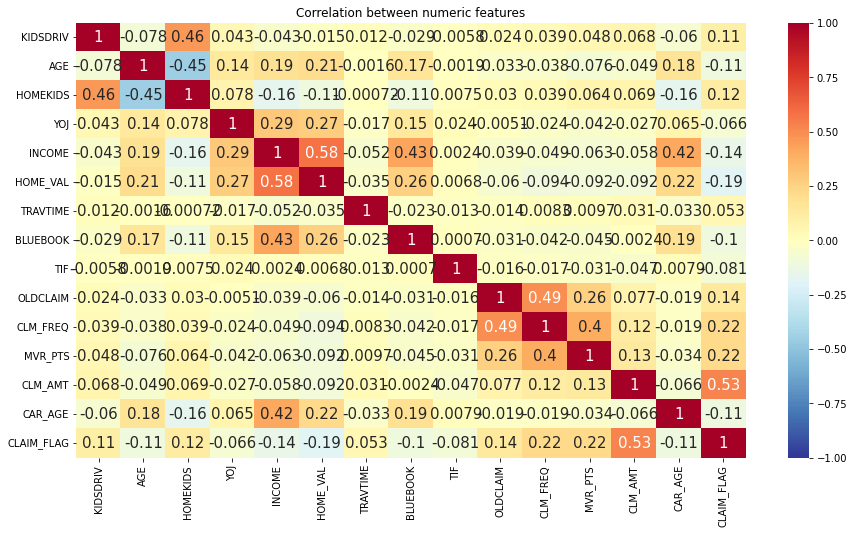

In [ ]:
# Plot the heatmap of correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(corr, cmap='RdYlBu_r', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 15}, )
plt.title('Correlation between numeric features')
plt.show()

In [ ]:
# Filter out only the categoric variables from the dataframe
data.describe(include=object)

,BIRTH,PARENT1,MSTATUS,GENDER,EDUCATION,OCCUPATION,CAR_USE,CAR_TYPE,RED_CAR,REVOKED,URBANICITY
count,10302,10302,10302,10302,10302,9637,10302,10302,10302,10302,10302
unique,6560,2,2,2,5,8,2,6,2,2,2
top,20OCT60,No,Yes,F,High School,Blue Collar,Private,SUV,no,No,Urban
freq,8,8959,6188,5545,2952,2288,6513,2883,7326,9041,8230


There are 11 categorical variables. From the output we see that the variable 'BIRTH' has most number of categories. There are 6560 dates in the data, of which 20OCT60 occurs most of the time.

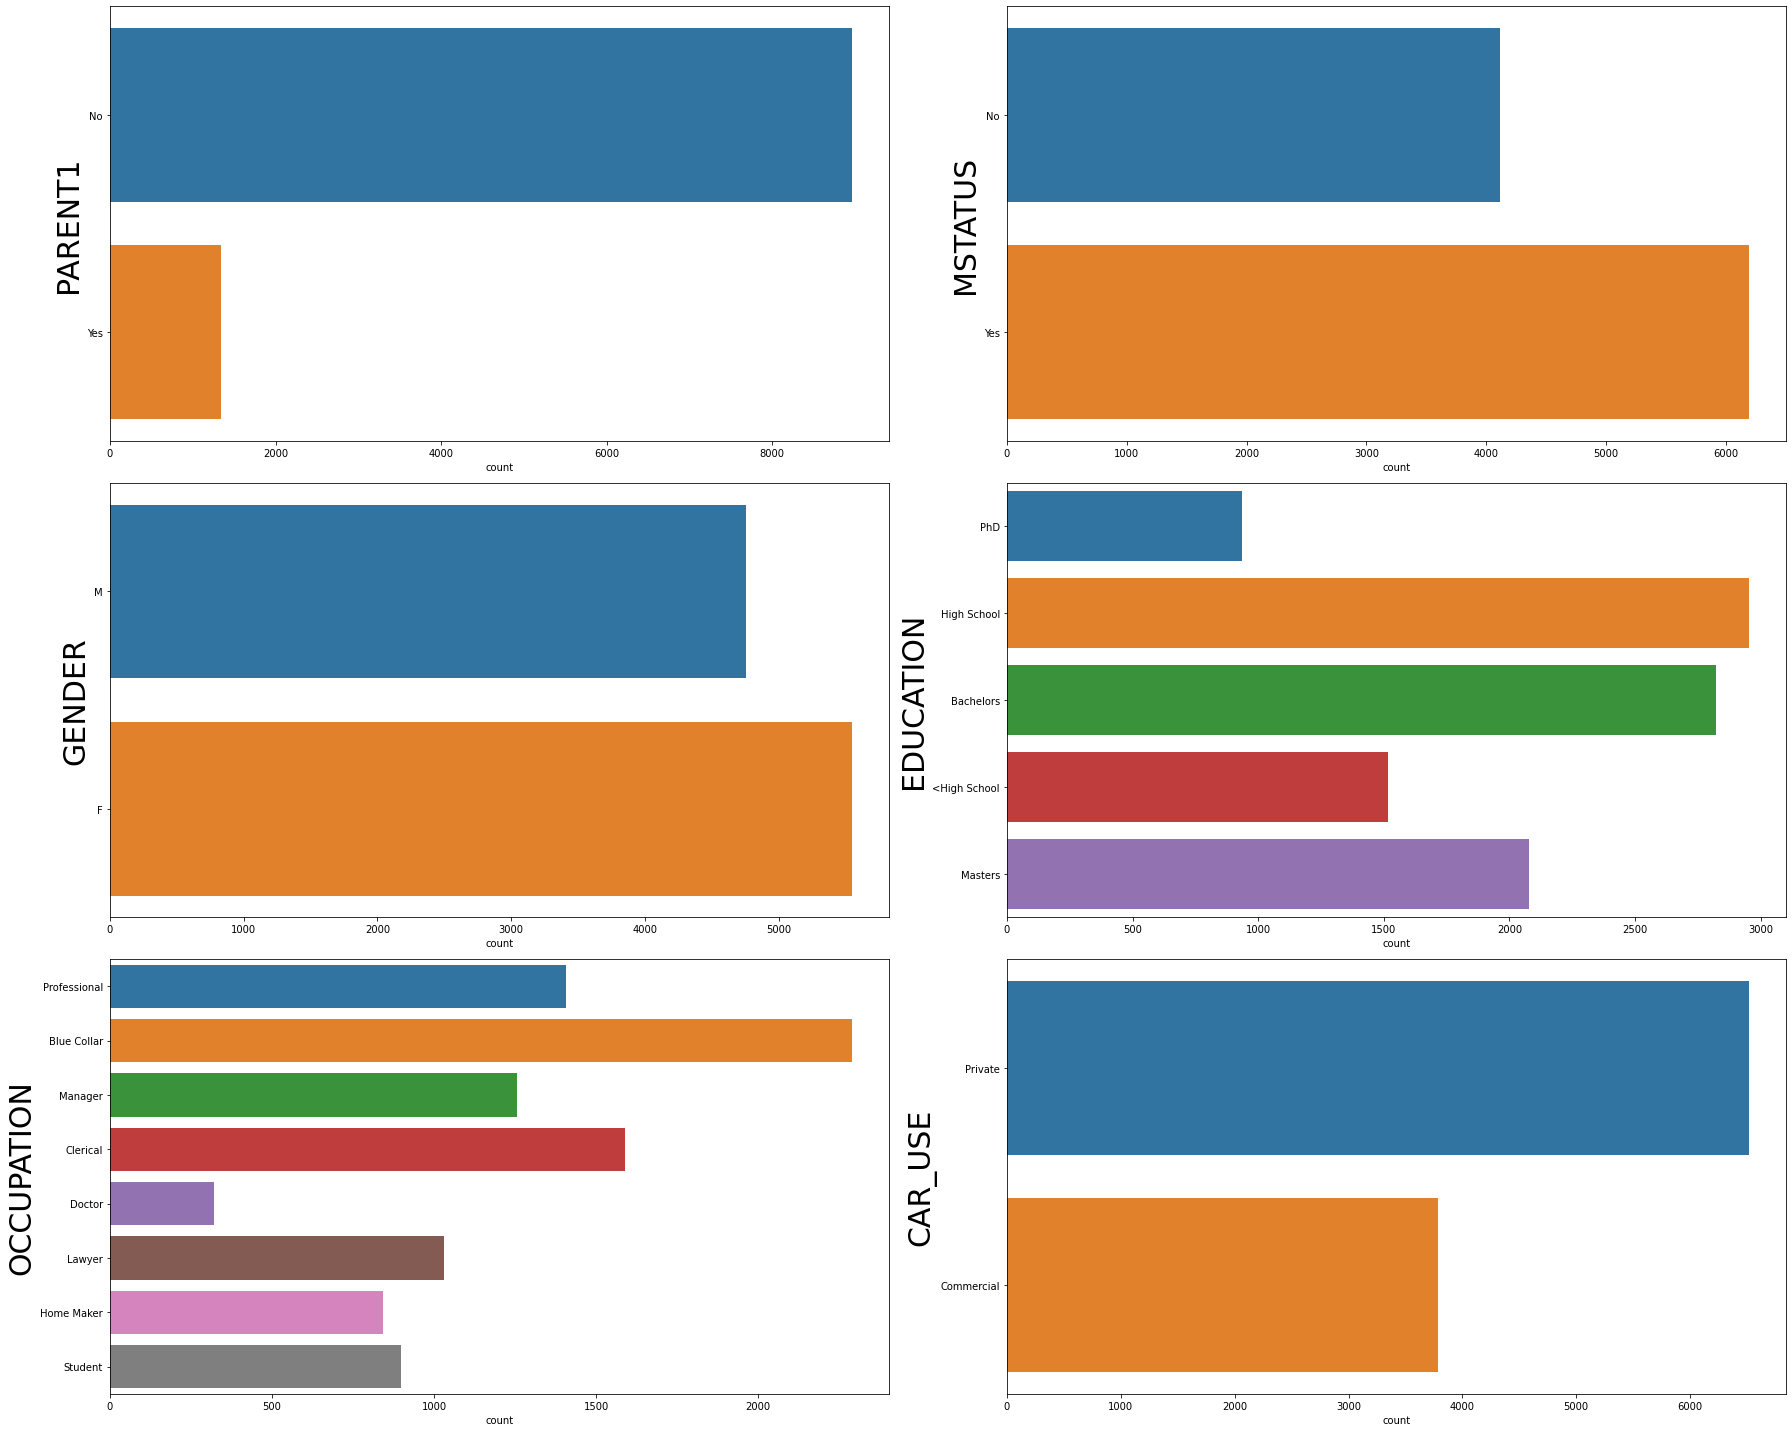

In [ ]:
categoric_features = data.select_dtypes(include='object').drop(['BIRTH'], axis=1)
fig, ax = plt.subplots(3, 2, figsize=(25, 20))
for variable, subplot in zip(categoric_features, ax.flatten()):
    countplot = sns.countplot(y=data[variable], ax=subplot )
    countplot.set_ylabel(variable, fontsize = 30)
plt.tight_layout()   
plt.show()

##### From the above plot we see that: 
* The number of single parents are few in number
* Most of them are married
* The number of females are higher than males
* Most of the people in the data have high school education & only few are having PhD
* Occupation of most of the people is Blue Collar & few are doctors
* Commercial usage of car is significantly low compared to private

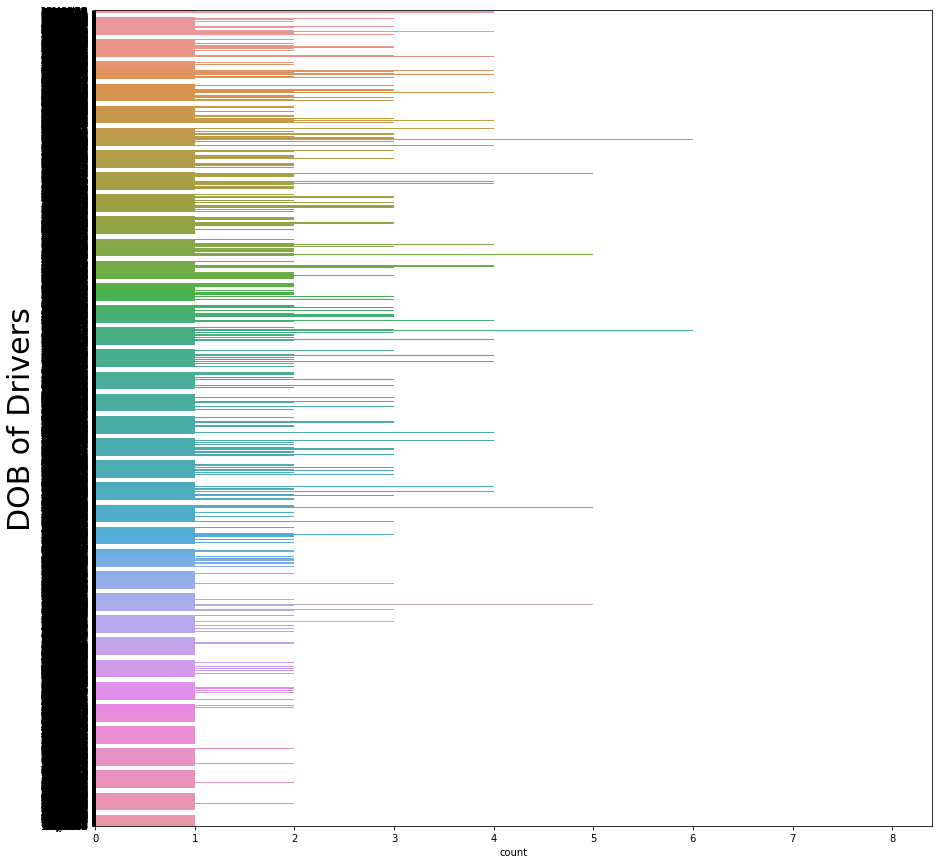

In [ ]:
plt.figure(figsize=(15, 15))
countplot = sns.countplot(y=data['BIRTH'], orient="h")
countplot.set_ylabel('DOB of Drivers', fontsize = 30)
plt.show()

We see that there are many dates considered in the data. It is quite difficult to perform meaningful analysis on this variable.

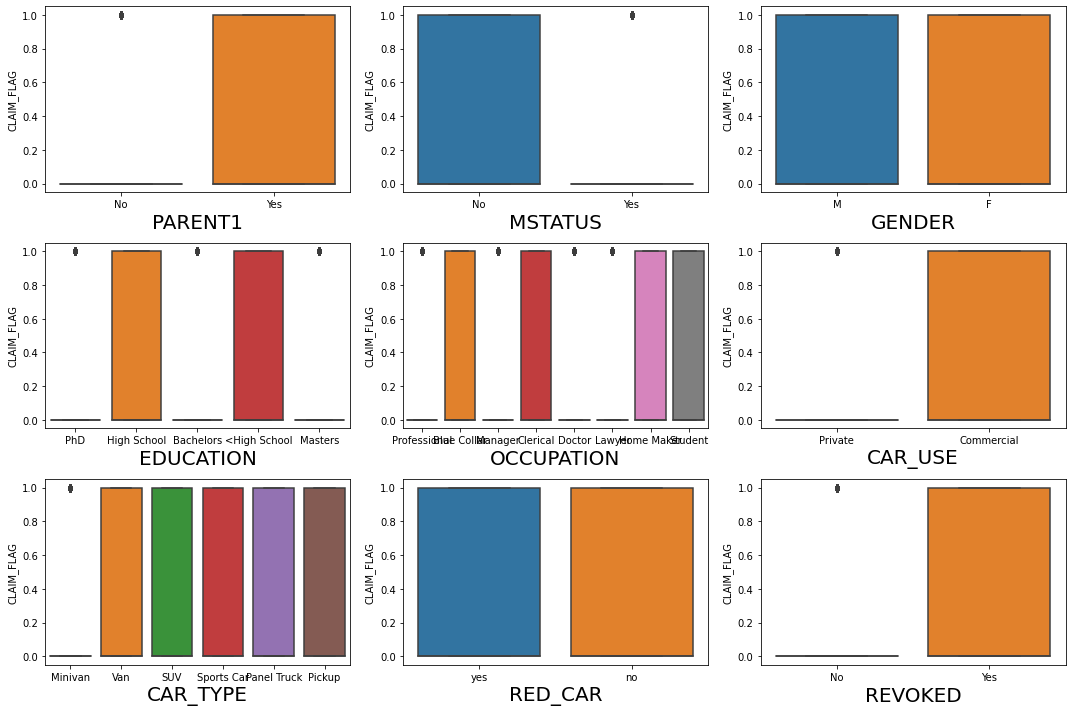

In [ ]:
#  Analyze Relationship Between Target and Categorical Variables
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for variable, subplot in zip(categoric_features, ax.flatten()):
    boxplt = sns.boxplot(x=variable, y='CLAIM_FLAG', data=data, ax=subplot)
    boxplt.set_xlabel(variable, fontsize = 20)
plt.tight_layout()   
plt.show() 

In [ ]:
data.groupby(('URBANICITY'),['GENDER']=='M').max()

,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
URBANICITY,,,,,,,,,,,,,,,,,,,,,
Rural,4,31OCT58,76.0,5,19.0,282292.0,Yes,583508.0,Yes,M,...,25,Van,yes,50807.0,4,Yes,13,64182.0,26.0,1
Urban,4,31OCT73,81.0,5,23.0,367030.0,Yes,885282.0,Yes,M,...,25,Van,yes,57037.0,5,Yes,13,123247.0,28.0,1


In [ ]:
data.groupby(('CAR_TYPE'),['RED_CAR']=='yes').max()

,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,TIF,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
CAR_TYPE,,,,,,,,,,,,,,,,,,,,,
Minivan,3,31OCT73,80.0,5,23.0,367030.0,Yes,885282.0,Yes,M,...,25,yes,53986.0,5,Yes,11,77907.0,26.0,1,Urban
Panel Truck,3,31OCT58,62.0,5,19.0,332339.0,Yes,750455.0,Yes,M,...,21,yes,52507.0,5,Yes,11,78874.0,25.0,1,Urban
Pickup,4,31OCT69,68.0,5,19.0,309628.0,Yes,669271.0,Yes,M,...,22,yes,51345.0,5,Yes,13,123247.0,24.0,1,Urban
SUV,4,31OCT59,72.0,5,19.0,264817.0,Yes,603984.0,Yes,M,...,25,yes,52465.0,5,Yes,12,61678.0,25.0,1,Urban
Sports Car,4,31OCT68,81.0,5,23.0,253058.0,Yes,550223.0,Yes,M,...,21,yes,57037.0,5,Yes,11,85524.0,25.0,1,Urban
Van,3,31OCT53,66.0,5,19.0,276354.0,Yes,630267.0,Yes,M,...,21,yes,54399.0,5,Yes,11,107586.0,28.0,1,Urban


## Missing Values

In [ ]:
data.isna().sum()

KIDSDRIV        0
BIRTH           0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
URBANICITY      0
dtype: int64

6 columns(4 numeric,2 category ??) has missing values ,of which occupation has the most missing value.

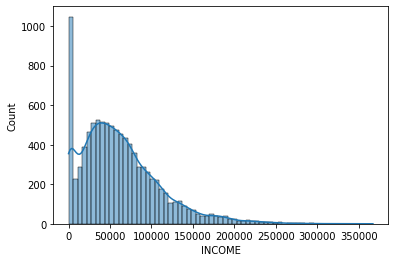

In [ ]:
sns.histplot(data['INCOME'],kde=True)

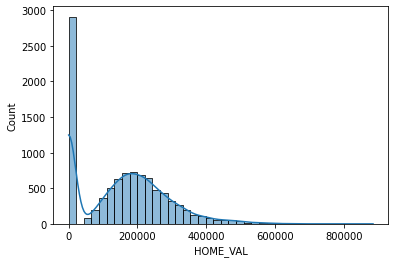

In [ ]:
sns.histplot(data['HOME_VAL'],kde=True)

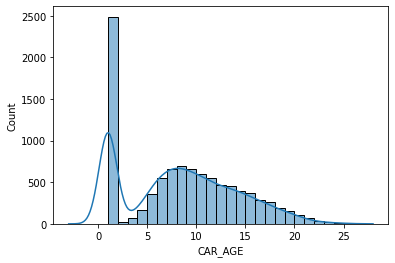

In [ ]:
sns.histplot(data['CAR_AGE'],kde=True)

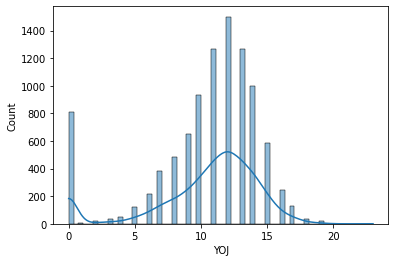

In [ ]:
sns.histplot(data['YOJ'],kde=True)

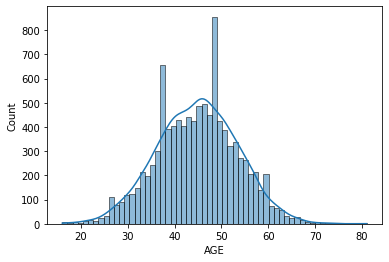

In [ ]:
sns.histplot(data['AGE'],kde=True)

In [ ]:
numeric_columns_with_null = ["YOJ", "INCOME", "HOME_VAL","CAR_AGE"]

##### We fill the numerical columns with mean imputation

In [ ]:
for col in numeric_columns_with_null:
    data[col] = data[col].fillna(data[col].median())

In [ ]:
data['AGE']=data['AGE'].fillna(data['AGE'].mean())

In [ ]:
categorical_columns_with_null = ["OCCUPATION"]

###### OCCUPATION is catagorical column so we fill it with Mode Imputation

In [ ]:
data['OCCUPATION'].value_counts()

Blue Collar     2288
Clerical        1590
Professional    1408
Manager         1257
Lawyer          1031
Student          899
Home Maker       843
Doctor           321
Name: OCCUPATION, dtype: int64

In [ ]:
data['OCCUPATION'].mode()

0    Blue Collar
dtype: object

In [ ]:
data['OCCUPATION'].fillna(data['OCCUPATION'].mode()[0],inplace=True)

In [ ]:
data.isna().sum()

KIDSDRIV      0
BIRTH         0
AGE           0
HOMEKIDS      0
YOJ           0
INCOME        0
PARENT1       0
HOME_VAL      0
MSTATUS       0
GENDER        0
EDUCATION     0
OCCUPATION    0
TRAVTIME      0
CAR_USE       0
BLUEBOOK      0
TIF           0
CAR_TYPE      0
RED_CAR       0
OLDCLAIM      0
CLM_FREQ      0
REVOKED       0
MVR_PTS       0
CLM_AMT       0
CAR_AGE       0
CLAIM_FLAG    0
URBANICITY    0
dtype: int64

Text(0.5, 1.0, 'KIDSDRIV')

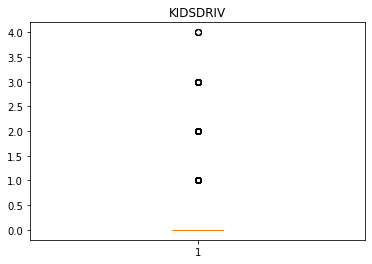

In [ ]:
plt.boxplot(data['KIDSDRIV'])
plt.title('KIDSDRIV')

In [ ]:
Q1=np.percentile(data['KIDSDRIV'],25,interpolation='midpoint')
Q2=np.percentile(data['KIDSDRIV'],50,interpolation='midpoint')
Q3=np.percentile(data['KIDSDRIV'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
0.0


In [ ]:
data['KIDSDRIV'].median()

0.0

In [ ]:
IQR=Q3-Q1
IQR

0.0

In [ ]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(lower_limit)
print(upper_limit)

0.0
0.0


In [ ]:
# find the outliers
data.loc[(data['KIDSDRIV'] > upper_limit) | (data['KIDSDRIV'] < lower_limit)]

,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
index,,,,,,,,,,,,,,,,,,,,,
9,1,17SEP59,40.0,1,11.0,50815.0,Yes,0.0,No,M,...,Minivan,no,3295.0,1,No,2,6477.0,1.0,1,Urban
11,1,14DEC61,37.0,2,11.0,107961.0,No,333680.0,Yes,M,...,Van,yes,2374.0,1,Yes,10,4021.0,7.0,1,Urban
29,2,06JUL55,44.0,2,0.0,0.0,No,82344.0,Yes,F,...,SUV,no,3338.0,3,No,0,0.0,11.0,0,Urban
34,1,09APR55,44.0,2,17.0,45488.0,No,219378.0,Yes,M,...,Minivan,no,0.0,0,No,0,0.0,12.0,0,Urban
39,2,03AUG63,36.0,2,12.0,130540.0,Yes,344195.0,No,F,...,Minivan,no,0.0,0,No,0,0.0,9.0,0,Rural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10271,2,03NOV58,41.0,3,12.0,9991.0,Yes,0.0,No,F,...,SUV,no,0.0,0,No,0,0.0,9.0,0,Rural
10273,1,29AUG53,46.0,0,10.0,84667.0,No,236725.0,Yes,F,...,Panel Truck,no,0.0,0,No,0,0.0,7.0,0,Urban
10292,1,14FEB53,46.0,0,12.0,45018.0,No,0.0,No,M,...,Minivan,no,33026.0,3,No,0,0.0,1.0,0,Rural


In [ ]:
# capping - change the outlier values to upper (or) lower limit values
new_data = data.copy()
new_data.loc[(new_data['KIDSDRIV']>upper_limit), 'KIDSDRIV'] = upper_limit
new_data.loc[(new_data['KIDSDRIV']<lower_limit), 'KIDSDRIV'] = lower_limit

Text(0.5, 1.0, 'KIDSDRIV')

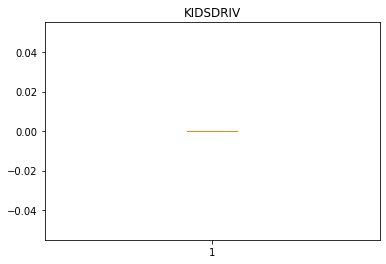

In [ ]:
plt.boxplot(new_data['KIDSDRIV'])
plt.title('KIDSDRIV')

Text(0.5, 1.0, 'TRAVTIME')

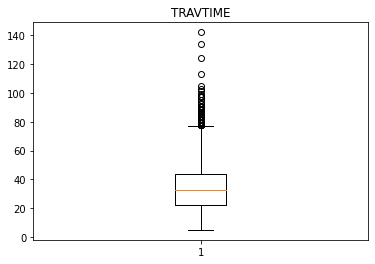

In [ ]:
plt.boxplot(data['TRAVTIME'])
plt.title('TRAVTIME')

In [ ]:
Q1=np.percentile(data['TRAVTIME'],25,interpolation='midpoint')
Q2=np.percentile(data['TRAVTIME'],50,interpolation='midpoint')
Q3=np.percentile(data['TRAVTIME'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

22.0
33.0
44.0


In [ ]:
IQR=Q3-Q1
IQR

22.0

In [ ]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(lower_limit)
print(upper_limit)

-11.0
77.0


In [ ]:
# find the outliers
data.loc[(data['TRAVTIME'] > upper_limit) | (data['TRAVTIME'] < lower_limit)]

,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
index,,,,,,,,,,,,,,,,,,,,,
261,0,29OCT66,33.0,1,11.0,86187.0,Yes,241285.0,No,M,...,Minivan,no,0.0,0,No,1,0.0,5.0,0,Rural
273,0,20AUG45,54.0,0,11.0,44782.0,No,148676.0,No,F,...,SUV,no,0.0,0,No,0,5259.0,9.0,1,Urban
315,2,10APR48,51.0,2,14.0,62894.0,No,228994.0,Yes,F,...,Sports Car,no,0.0,0,Yes,0,0.0,10.0,0,Rural
659,1,25NOV55,43.0,2,13.0,45784.0,No,165388.0,Yes,M,...,Minivan,no,0.0,0,No,0,0.0,6.0,0,Urban
765,2,15NOV59,40.0,2,13.0,45777.0,No,199049.0,Yes,M,...,Van,yes,0.0,0,No,4,0.0,11.0,0,Rural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9667,0,08MAY23,76.0,0,15.0,46927.0,No,0.0,No,M,...,Minivan,yes,0.0,0,No,5,3589.0,15.0,1,Rural
9676,0,19OCT55,44.0,0,12.0,126608.0,No,354910.0,Yes,F,...,SUV,no,9869.0,1,No,3,0.0,8.0,0,Urban
10018,0,18JAN54,45.0,0,7.0,61598.0,No,202760.0,Yes,F,...,SUV,no,0.0,0,No,0,0.0,8.0,0,Rural


In [ ]:
# capping - change the outlier values to upper (or) lower limit values
new_data = data.copy()
new_data.loc[(new_data['TRAVTIME']>upper_limit), 'TRAVTIME'] = upper_limit
new_data.loc[(new_data['TRAVTIME']<lower_limit), 'TRAVTIME'] = lower_limit

Text(0.5, 1.0, 'TRAVTIME')

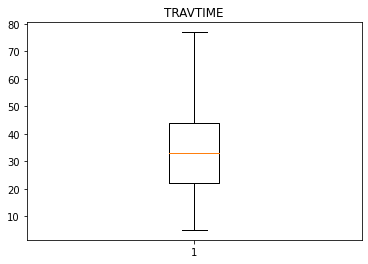

In [ ]:
plt.boxplot(new_data['TRAVTIME'])
plt.title('TRAVTIME')

Text(0.5, 1.0, 'AGE')

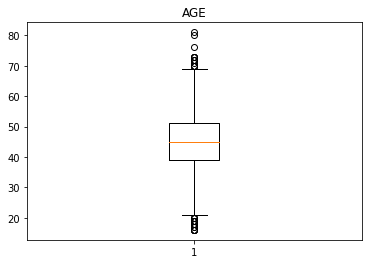

In [ ]:
plt.boxplot(new_data['AGE'])
plt.title('AGE')

In [ ]:
Q1=np.percentile(data['AGE'],25,interpolation='midpoint')
Q2=np.percentile(data['AGE'],50,interpolation='midpoint')
Q3=np.percentile(data['AGE'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

39.0
45.0
51.0


In [ ]:
IQR=Q3-Q1
IQR

12.0

In [ ]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(lower_limit)
print(upper_limit)

21.0
69.0


In [ ]:
# find the outliers
data.loc[(data['AGE'] > upper_limit) | (data['AGE'] < lower_limit)]

,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
index,,,,,,,,,,,,,,,,,,,,,
189,0,04JUL19,80.0,2,23.0,97716.0,No,389344.0,Yes,M,...,Minivan,yes,0.0,0,No,2,0.0,10.0,0,Urban
428,0,02JAN79,20.0,0,7.0,19933.0,No,105715.0,No,F,...,SUV,yes,4148.0,1,No,5,0.0,9.0,0,Urban
455,0,05MAY80,19.0,2,0.0,0.0,No,106041.0,Yes,F,...,SUV,no,5289.0,2,No,1,0.0,1.0,0,Rural
469,1,17JUL27,72.0,2,18.0,27625.0,No,162415.0,Yes,F,...,Sports Car,no,8571.0,1,No,8,4997.0,1.0,1,Urban
645,0,04JUN27,72.0,0,16.0,63890.0,No,256797.0,Yes,F,...,Sports Car,no,4448.0,3,No,0,917.0,6.0,1,Urban
1050,0,03SEP29,70.0,0,14.0,12280.0,No,0.0,No,F,...,SUV,no,2080.0,1,No,3,0.0,6.0,0,Urban
1521,0,07MAY29,70.0,0,16.0,62304.0,No,214707.0,Yes,F,...,Sports Car,no,4346.0,4,No,5,0.0,1.0,0,Urban
1728,0,18AUG82,17.0,1,0.0,53529.0,Yes,160661.0,No,M,...,Van,yes,4373.0,2,No,8,0.0,4.0,0,Rural
1767,0,05DEC26,72.0,0,13.0,100995.0,No,295292.0,Yes,M,...,SUV,yes,0.0,0,No,6,0.0,17.0,0,Urban


In [ ]:
# capping - change the outlier values to upper (or) lower limit values
new_data = data.copy()
new_data.loc[(new_data['AGE']>upper_limit), 'AGE'] = upper_limit
new_data.loc[(new_data['AGE']<lower_limit), 'AGE'] = lower_limit

Text(0.5, 1.0, 'AGE')

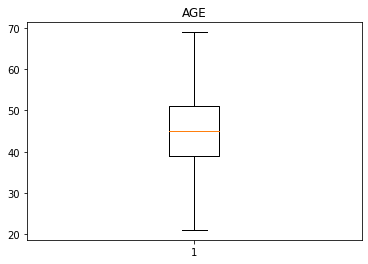

In [ ]:
plt.boxplot(new_data['AGE'])
plt.title('AGE')

Text(0.5, 1.0, 'HOMEKIDS')

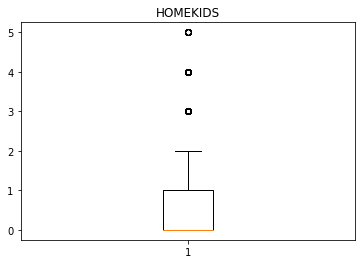

In [ ]:
plt.boxplot(data['HOMEKIDS'])
plt.title('HOMEKIDS')

In [ ]:
Q1=np.percentile(data['HOMEKIDS'],25,interpolation='midpoint')
Q2=np.percentile(data['HOMEKIDS'],50,interpolation='midpoint')
Q3=np.percentile(data['HOMEKIDS'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [ ]:
IQR=Q3-Q1
IQR

1.0

In [ ]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(lower_limit)
print(upper_limit)

-1.5
2.5


In [ ]:
# find the outliers
data.loc[(data['HOMEKIDS'] > upper_limit) | (data['HOMEKIDS'] < lower_limit)]

,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
index,,,,,,,,,,,,,,,,,,,,,
20,0,06AUG60,39.0,3,12.0,51884.0,Yes,180951.0,No,F,...,SUV,no,0.0,0,No,0,0.0,13.0,0,Rural
23,0,14SEP65,34.0,3,13.0,34019.0,No,91875.0,Yes,F,...,SUV,no,0.0,0,No,0,0.0,20.0,0,Urban
57,0,05JUN60,39.0,3,7.0,34046.0,No,183383.0,Yes,F,...,SUV,no,0.0,0,No,0,0.0,5.0,0,Rural
58,0,20MAY66,33.0,3,14.0,32364.0,No,152894.0,Yes,M,...,Minivan,yes,0.0,0,No,3,0.0,1.0,0,Urban
64,0,29JUN63,36.0,3,12.0,56048.0,No,137836.0,Yes,M,...,Minivan,no,2045.0,2,No,2,0.0,16.0,0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10237,0,05JUL64,35.0,3,14.0,50971.0,No,183050.0,Yes,F,...,SUV,no,518.0,1,No,1,0.0,13.0,0,Urban
10256,0,02MAR43,56.0,3,11.0,90186.0,No,278241.0,Yes,M,...,Minivan,yes,0.0,0,No,0,0.0,20.0,0,Urban
10271,2,03NOV58,41.0,3,12.0,9991.0,Yes,0.0,No,F,...,SUV,no,0.0,0,No,0,0.0,9.0,0,Rural


In [ ]:
# capping - change the outlier values to upper (or) lower limit values
new_data = data.copy()
new_data.loc[(new_data['HOMEKIDS']>upper_limit), 'HOMEKIDS'] = upper_limit
new_data.loc[(new_data['HOMEKIDS']<lower_limit), 'HOMEKIDS'] = lower_limit

Text(0.5, 1.0, 'HOMEKIDS')

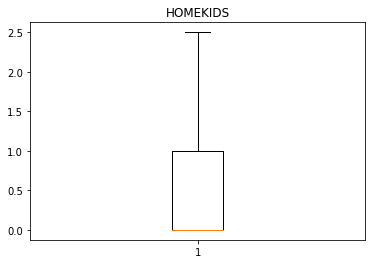

In [ ]:
plt.boxplot(new_data['HOMEKIDS'])
plt.title('HOMEKIDS')

Text(0.5, 1.0, 'INCOME')

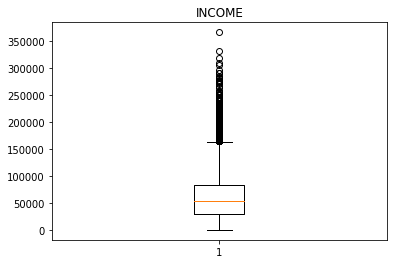

In [ ]:
plt.boxplot(data['INCOME'])
plt.title('INCOME')

In [ ]:
Q1=np.percentile(data['INCOME'],25,interpolation='midpoint')
Q2=np.percentile(data['INCOME'],50,interpolation='midpoint')
Q3=np.percentile(data['INCOME'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

29168.5
53529.0
83228.5


In [ ]:
IQR=Q3-Q1
IQR

54060.0

In [ ]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(lower_limit)
print(upper_limit)

-51921.5
164318.5


In [ ]:
# find the outliers
data.loc[(data['INCOME'] > upper_limit) | (data['INCOME'] < lower_limit)]

,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
index,,,,,,,,,,,,,,,,,,,,,
47,0,30JUN49,50.0,0,8.0,167469.0,No,0.0,No,F,...,Sports Car,no,0.0,0,No,3,0.0,1.0,0,Urban
80,0,03DEC53,45.0,1,11.0,185836.0,No,509115.0,Yes,F,...,SUV,no,4307.0,3,No,6,0.0,20.0,0,Urban
129,0,26JUL43,56.0,2,14.0,192089.0,No,471701.0,Yes,M,...,Van,yes,0.0,0,No,0,6484.0,8.0,1,Urban
300,0,30APR49,50.0,0,10.0,219024.0,No,0.0,No,M,...,Panel Truck,yes,4117.0,2,No,4,0.0,20.0,0,Urban
373,0,27FEB53,46.0,0,13.0,266027.0,No,0.0,No,M,...,Panel Truck,yes,1332.0,3,No,6,0.0,23.0,0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10176,0,25FEB52,47.0,0,12.0,221995.0,No,545044.0,Yes,F,...,SUV,no,6682.0,3,No,3,0.0,1.0,0,Urban
10183,0,22SEP56,43.0,0,11.0,229983.0,No,0.0,No,M,...,Panel Truck,yes,8983.0,2,No,1,0.0,15.0,0,Urban
10252,1,14APR43,56.0,2,14.0,176849.0,No,430830.0,Yes,F,...,SUV,no,0.0,0,No,0,7308.0,6.0,1,Urban


In [ ]:
# capping - change the outlier values to upper (or) lower limit values
new_data = data.copy()
new_data.loc[(new_data['INCOME']>upper_limit), 'INCOME'] = upper_limit
new_data.loc[(new_data['INCOME']<lower_limit), 'INCOME'] = lower_limit

Text(0.5, 1.0, 'INCOME')

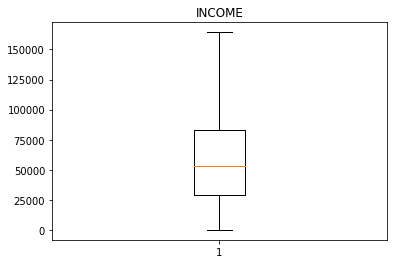

In [ ]:
plt.boxplot(new_data['INCOME'])
plt.title('INCOME')

Text(0.5, 1.0, 'BLUEBOOK')

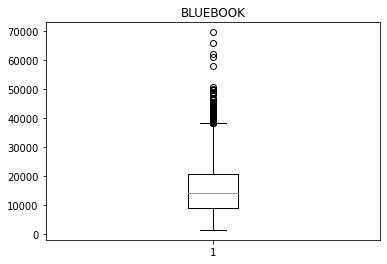

In [ ]:
plt.boxplot(data['BLUEBOOK'])
plt.title('BLUEBOOK')

In [ ]:
Q1=np.percentile(data['BLUEBOOK'],25,interpolation='midpoint')
Q2=np.percentile(data['BLUEBOOK'],50,interpolation='midpoint')
Q3=np.percentile(data['BLUEBOOK'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

9200.0
14400.0
20890.0


In [ ]:
IQR=Q3-Q1
IQR

11690.0

In [ ]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(lower_limit)
print(upper_limit)

-8335.0
38425.0


In [ ]:
# find the outliers
data.loc[(data['BLUEBOOK'] > upper_limit) | (data['BLUEBOOK'] < lower_limit)]

,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
index,,,,,,,,,,,,,,,,,,,,,
235,0,17OCT63,36.0,3,11.0,49703.0,Yes,253132.0,No,M,...,Panel Truck,yes,35879.0,1,Yes,0,53571.0,20.0,1,Urban
424,0,06AUG44,55.0,0,14.0,81188.0,No,296244.0,No,M,...,Panel Truck,no,0.0,0,No,3,0.0,8.0,0,Urban
611,0,04JUL47,52.0,0,13.0,255823.0,No,0.0,No,F,...,Panel Truck,no,0.0,0,No,3,0.0,8.0,0,Urban
751,0,18JUL60,39.0,0,10.0,198320.0,No,494094.0,Yes,M,...,Minivan,yes,0.0,0,No,1,0.0,1.0,0,Urban
879,0,12AUG45,54.0,0,6.0,73663.0,No,268990.0,Yes,M,...,Panel Truck,no,36700.0,1,Yes,3,0.0,5.0,0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10046,0,04MAR63,36.0,0,6.0,76535.0,No,0.0,No,F,...,Van,no,0.0,0,No,0,0.0,8.0,0,Rural
10127,0,29JAN43,56.0,0,6.0,103503.0,No,160661.0,No,M,...,Panel Truck,yes,0.0,0,No,0,0.0,15.0,0,Rural
10176,0,25FEB52,47.0,0,12.0,221995.0,No,545044.0,Yes,F,...,SUV,no,6682.0,3,No,3,0.0,1.0,0,Urban


In [ ]:
# capping - change the outlier values to upper (or) lower limit values
new_data = data.copy()
new_data.loc[(new_data['BLUEBOOK']>upper_limit), 'BLUEBOOK'] = upper_limit
new_data.loc[(new_data['BLUEBOOK']<lower_limit), 'BLUEBOOK'] = lower_limit

Text(0.5, 1.0, 'BLUEBOOK')

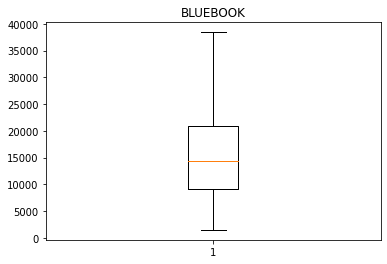

In [ ]:
plt.boxplot(new_data['BLUEBOOK'])
plt.title('BLUEBOOK')

Text(0.5, 1.0, 'TIF')

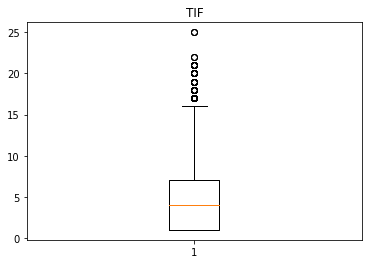

In [ ]:
plt.boxplot(data['TIF'])
plt.title('TIF')

In [ ]:
Q1=np.percentile(data['TIF'],25,interpolation='midpoint')
Q2=np.percentile(data['TIF'],50,interpolation='midpoint')
Q3=np.percentile(data['TIF'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

1.0
4.0
7.0


In [ ]:
IQR=Q3-Q1
IQR

6.0

In [ ]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(lower_limit)
print(upper_limit)

-8.0
16.0


In [ ]:
# find the outliers
data.loc[(data['TIF'] > upper_limit) | (data['TIF'] < lower_limit)]

,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
index,,,,,,,,,,,,,,,,,,,,,
34,1,09APR55,44.0,2,17.0,45488.0,No,219378.0,Yes,M,...,Minivan,no,0.0,0,No,0,0.0,12.0,0,Urban
58,0,20MAY66,33.0,3,14.0,32364.0,No,152894.0,Yes,M,...,Minivan,yes,0.0,0,No,3,0.0,1.0,0,Urban
146,0,16JAN52,47.0,0,12.0,64259.0,No,202031.0,Yes,M,...,Minivan,no,9526.0,4,No,3,0.0,9.0,0,Urban
244,0,08MAR49,50.0,0,14.0,90566.0,No,295771.0,No,F,...,Van,no,0.0,0,No,0,0.0,18.0,0,Urban
261,0,29OCT66,33.0,1,11.0,86187.0,Yes,241285.0,No,M,...,Minivan,no,0.0,0,No,1,0.0,5.0,0,Rural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9908,0,28JUN52,47.0,0,9.0,147216.0,No,371761.0,Yes,F,...,SUV,no,0.0,0,No,1,0.0,6.0,0,Urban
10002,0,03SEP44,55.0,0,10.0,86663.0,No,0.0,No,F,...,SUV,no,0.0,0,No,0,0.0,5.0,0,Urban
10014,0,22JUN44,55.0,0,12.0,165632.0,No,413216.0,Yes,F,...,SUV,no,0.0,0,No,0,0.0,18.0,0,Urban


In [ ]:
# capping - change the outlier values to upper (or) lower limit values
new_data = data.copy()
new_data.loc[(new_data['TIF']>upper_limit), 'TIF'] = upper_limit
new_data.loc[(new_data['TIF']<lower_limit), 'TIF'] = lower_limit

Text(0.5, 1.0, 'TIF')

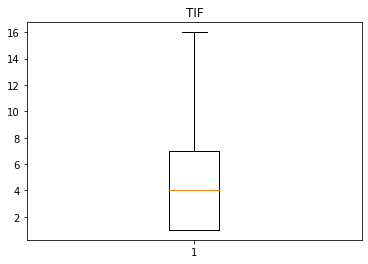

In [ ]:
plt.boxplot(new_data['TIF'])
plt.title('TIF')

Text(0.5, 1.0, 'OLDCLAIM')

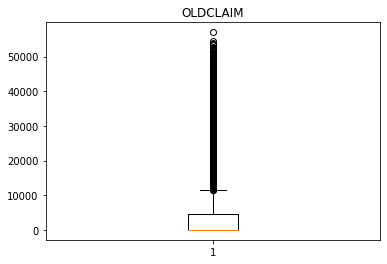

In [ ]:
plt.boxplot(new_data['OLDCLAIM'])
plt.title('OLDCLAIM')

In [ ]:
Q1=np.percentile(data['OLDCLAIM'],25,interpolation='midpoint')
Q2=np.percentile(data['OLDCLAIM'],50,interpolation='midpoint')
Q3=np.percentile(data['OLDCLAIM'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
4647.0


In [ ]:
IQR=Q3-Q1
IQR

4647.0

In [ ]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(lower_limit)
print(upper_limit)

-6970.5
11617.5


In [ ]:
# find the outliers
data.loc[(data['OLDCLAIM'] > upper_limit) | (data['OLDCLAIM'] < lower_limit)]

,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
index,,,,,,,,,,,,,,,,,,,,,
4,0,05MAR64,35.0,1,10.0,16039.0,No,124191.0,Yes,F,...,SUV,no,38690.0,2,No,3,0.0,10.0,0,Urban
6,0,17MAY49,50.0,0,11.0,114986.0,No,243925.0,Yes,F,...,SUV,no,19217.0,2,Yes,3,0.0,17.0,0,Urban
21,0,19APR40,59.0,0,12.0,87460.0,No,0.0,No,M,...,Minivan,yes,44857.0,2,No,4,4111.0,1.0,1,Urban
36,0,06MAY59,40.0,2,0.0,53529.0,No,98777.0,Yes,F,...,SUV,no,38127.0,2,Yes,4,0.0,12.0,0,Rural
61,0,26APR59,40.0,0,11.0,16989.0,No,0.0,No,M,...,Pickup,yes,26104.0,1,Yes,13,6100.0,6.0,1,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10272,0,03JAN52,47.0,0,15.0,31045.0,No,138614.0,Yes,F,...,SUV,no,44376.0,1,Yes,0,0.0,8.0,0,Urban
10279,0,12JUN53,46.0,0,0.0,0.0,No,0.0,Yes,F,...,Sports Car,no,20519.0,1,Yes,3,0.0,8.0,0,Rural
10288,0,11OCT54,45.0,0,11.0,52966.0,No,0.0,No,M,...,Pickup,yes,16239.0,2,Yes,5,2967.0,1.0,1,Urban


In [ ]:
# capping - change the outlier values to upper (or) lower limit values
new_data = data.copy()
new_data.loc[(new_data['OLDCLAIM']>upper_limit), 'OLDCLAIM'] = upper_limit
new_data.loc[(new_data['OLDCLAIM']<lower_limit), 'OLDCLAIM'] = lower_limit

Text(0.5, 1.0, 'OLDCLAIM')

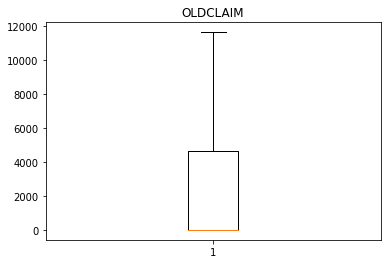

In [ ]:
plt.boxplot(new_data['OLDCLAIM'])
plt.title('OLDCLAIM')

Text(0.5, 1.0, 'CLM_FREQ')

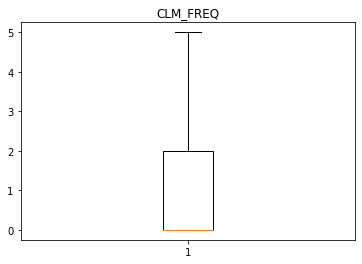

In [ ]:
plt.boxplot(data['CLM_FREQ'])
plt.title('CLM_FREQ')

Text(0.5, 1.0, 'MVR_PTS')

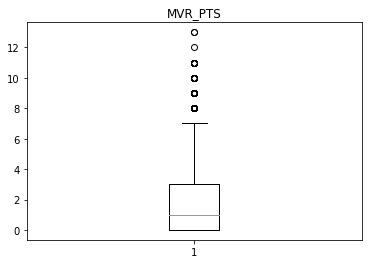

In [ ]:
plt.boxplot(data['MVR_PTS'])
plt.title('MVR_PTS')

In [ ]:
Q1=np.percentile(data['MVR_PTS'],25,interpolation='midpoint')
Q2=np.percentile(data['MVR_PTS'],50,interpolation='midpoint')
Q3=np.percentile(data['MVR_PTS'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
1.0
3.0


In [ ]:
IQR=Q3-Q1
IQR

3.0

In [ ]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(lower_limit)
print(upper_limit)

-4.5
7.5


In [ ]:
# find the outliers
data.loc[(data['MVR_PTS'] > upper_limit) | (data['MVR_PTS'] < lower_limit)]

,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
index,,,,,,,,,,,,,,,,,,,,,
11,1,14DEC61,37.0,2,11.0,107961.0,No,333680.0,Yes,M,...,Van,yes,2374.0,1,Yes,10,4021.0,7.0,1,Urban
61,0,26APR59,40.0,0,11.0,16989.0,No,0.0,No,M,...,Pickup,yes,26104.0,1,Yes,13,6100.0,6.0,1,Urban
76,2,02JAN55,44.0,2,14.0,45576.0,No,156623.0,Yes,F,...,Sports Car,no,25276.0,1,No,8,0.0,8.0,0,Urban
186,1,14JAN59,40.0,2,12.0,35260.0,No,141167.0,Yes,F,...,SUV,no,2235.0,1,No,8,0.0,1.0,0,Urban
283,0,21AUG55,44.0,0,8.0,32317.0,No,0.0,No,M,...,Minivan,yes,3738.0,1,No,8,4363.0,1.0,1,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10092,0,17AUG49,50.0,0,10.0,62880.0,No,0.0,No,F,...,SUV,no,4538.0,4,No,11,5627.0,11.0,1,Urban
10113,1,28AUG57,42.0,1,11.0,53357.0,No,209447.0,Yes,M,...,Panel Truck,no,6517.0,1,No,8,7506.0,1.0,1,Urban
10124,0,07OCT61,38.0,0,11.0,20148.0,No,0.0,No,F,...,Sports Car,no,14850.0,3,Yes,10,5726.0,2.0,1,Urban


In [ ]:
# capping - change the outlier values to upper (or) lower limit values
new_data = data.copy()
new_data.loc[(new_data['MVR_PTS']>upper_limit), 'MVR_PTS'] = upper_limit
new_data.loc[(new_data['MVR_PTS']<lower_limit), 'MVR_PTS'] = lower_limit

Text(0.5, 1.0, 'MVR_PTS')

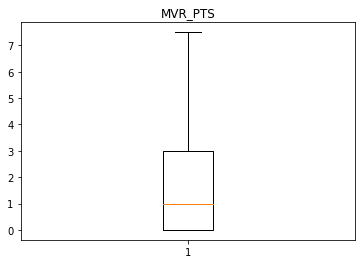

In [ ]:
plt.boxplot(new_data['MVR_PTS'])
plt.title('MVR_PTS')

Text(0.5, 1.0, 'CLM_AMT')

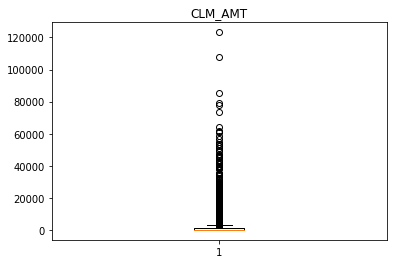

In [ ]:
plt.boxplot(data['CLM_AMT'])
plt.title('CLM_AMT')

In [ ]:
Q1=np.percentile(data['CLM_AMT'],25,interpolation='midpoint')
Q2=np.percentile(data['CLM_AMT'],50,interpolation='midpoint')
Q3=np.percentile(data['CLM_AMT'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1144.5


In [ ]:
IQR=Q3-Q1
IQR

1144.5

In [ ]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(lower_limit)
print(upper_limit)

-1716.75
2861.25


In [ ]:
# find the outliers
data.loc[(data['CLM_AMT'] > upper_limit) | (data['CLM_AMT'] < lower_limit)]

,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
index,,,,,,,,,,,,,,,,,,,,,
7,0,05MAY65,34.0,1,12.0,125301.0,Yes,0.0,No,F,...,Sports Car,no,0.0,0,No,0,2946.0,7.0,1,Urban
9,1,17SEP59,40.0,1,11.0,50815.0,Yes,0.0,No,M,...,Minivan,no,3295.0,1,No,2,6477.0,1.0,1,Urban
11,1,14DEC61,37.0,2,11.0,107961.0,No,333680.0,Yes,M,...,Van,yes,2374.0,1,Yes,10,4021.0,7.0,1,Urban
14,0,25DEC45,53.0,0,14.0,77100.0,No,0.0,No,F,...,Sports Car,no,0.0,0,No,0,6077.0,11.0,1,Urban
19,0,17JAN54,45.0,0,0.0,0.0,No,106859.0,Yes,F,...,SUV,no,0.0,0,No,3,2920.0,5.0,1,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10261,0,30AUG52,47.0,0,11.0,112264.0,No,0.0,No,M,...,Panel Truck,yes,22762.0,1,Yes,5,3179.0,20.0,1,Urban
10263,0,26FEB52,47.0,0,13.0,282198.0,No,649247.0,No,M,...,Panel Truck,yes,0.0,0,Yes,2,3106.0,16.0,1,Urban
10270,0,30JUN53,46.0,0,10.0,68360.0,No,237457.0,No,M,...,Minivan,no,6560.0,3,No,7,3135.0,11.0,1,Urban


In [ ]:
# capping - change the outlier values to upper (or) lower limit values
new_data = data.copy()
new_data.loc[(new_data['CLM_AMT']>upper_limit), 'CLM_AMT'] = upper_limit
new_data.loc[(new_data['CLM_AMT']<lower_limit), 'CLM_AMT'] = lower_limit

Text(0.5, 1.0, 'CLM_AMT')

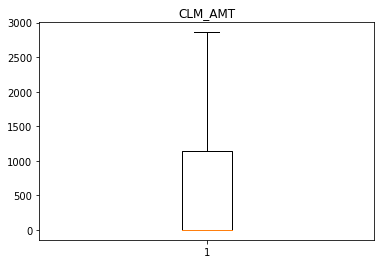

In [ ]:
plt.boxplot(new_data['CLM_AMT'])
plt.title('CLM_AMT')

Text(0.5, 1.0, 'CAR_AGE')

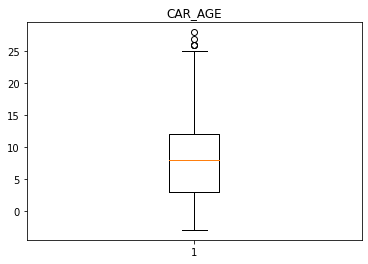

In [ ]:
plt.boxplot(data['CAR_AGE'])
plt.title('CAR_AGE')

In [ ]:
Q1=np.percentile(data['CAR_AGE'],25,interpolation='midpoint')
Q2=np.percentile(data['CAR_AGE'],50,interpolation='midpoint')
Q3=np.percentile(data['CAR_AGE'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

3.0
8.0
12.0


In [ ]:
IQR=Q3-Q1
IQR

9.0

In [ ]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(lower_limit)
print(upper_limit)

-10.5
25.5


In [ ]:
# find the outliers
data.loc[(data['CAR_AGE'] > upper_limit) | (data['CAR_AGE'] < lower_limit)]

,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
index,,,,,,,,,,,,,,,,,,,,,
882,0,01MAR47,52.0,0,12.0,82599.0,No,0.0,No,F,...,Minivan,no,0.0,0,No,2,0.0,26.0,0,Urban
2244,0,20FEB53,46.0,0,9.0,98346.0,No,296257.0,Yes,M,...,Van,no,0.0,0,No,1,0.0,27.0,0,Urban
3763,0,12OCT49,50.0,0,11.0,114923.0,No,298946.0,Yes,F,...,Minivan,no,0.0,0,No,7,0.0,26.0,0,Urban
5119,0,10OCT46,53.0,0,10.0,37965.0,No,178189.0,Yes,F,...,Minivan,no,0.0,0,No,1,0.0,26.0,0,Rural
9819,0,11JUN54,45.0,3,16.0,60945.0,No,189813.0,Yes,F,...,Van,no,0.0,0,No,0,0.0,28.0,0,Urban


In [ ]:
# capping - change the outlier values to upper (or) lower limit values
new_data = data.copy()
new_data.loc[(new_data['CAR_AGE']>upper_limit), 'CAR_AGE'] = upper_limit
new_data.loc[(new_data['CAR_AGE']<lower_limit), 'CAR_AGE'] = lower_limit

Text(0.5, 1.0, 'CAR_AGE')

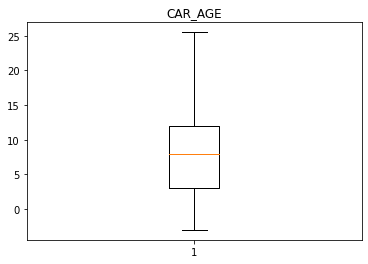

In [ ]:
plt.boxplot(new_data['CAR_AGE'])
plt.title('CAR_AGE')

Text(0.5, 1.0, 'YOJ')

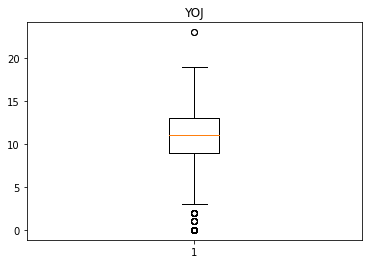

In [ ]:
plt.boxplot(data['YOJ'])
plt.title('YOJ')

In [ ]:
Q1=np.percentile(data['YOJ'],25,interpolation='midpoint')
Q2=np.percentile(data['YOJ'],50,interpolation='midpoint')
Q3=np.percentile(data['YOJ'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

9.0
11.0
13.0


In [ ]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(lower_limit)
print(upper_limit)

-4.5
26.5


In [ ]:
# find the outliers
data.loc[(data['YOJ'] > upper_limit) | (data['YOJ'] < lower_limit)]

,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
index,,,,,,,,,,,,,,,,,,,,,


In [ ]:
# capping - change the outlier values to upper (or) lower limit values
new_data = data.copy()
new_data.loc[(new_data['YOJ']>upper_limit), 'YOJ'] = upper_limit
new_data.loc[(new_data['YOJ']<lower_limit), 'YOJ'] = lower_limit

Text(0.5, 1.0, 'YOJ')

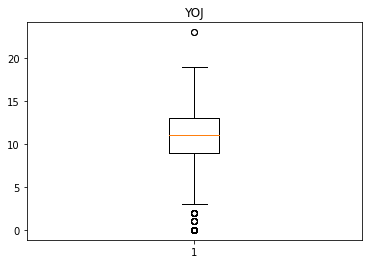

In [ ]:
plt.boxplot(new_data['YOJ'])
plt.title('YOJ')

# Label Encoding

* Often in machine learning, we want to convert categorical variables into some type of numeric format that can be readily used by algorithms.

* One way to do this is through label encoding, which assigns each categorical value an integer value based on alphabetical order.

In [ ]:
from sklearn.preprocessing import LabelEncoder
column = ['BIRTH', 'PARENT1','MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'CAR_USE', 'CAR_TYPE', 'RED_CAR', 'REVOKED','URBANICITY']
le = LabelEncoder()

for col in column:
    new_data[col] = le.fit_transform(new_data[col])
new_data.head()

,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
index,,,,,,,,,,,,,,,,,,,,,
1,0,3348,60.0,0,11.0,67349.0,0,0.0,0,1,...,0,1,4461.0,2,0,3,0.0,18.0,0,1
2,0,4406,43.0,0,11.0,91449.0,0,257252.0,0,1,...,0,1,0.0,0,0,0,0.0,1.0,0,1
3,0,3850,48.0,0,11.0,52881.0,0,0.0,0,1,...,5,1,0.0,0,0,2,0.0,10.0,0,1
4,0,1023,35.0,1,10.0,16039.0,0,124191.0,1,0,...,3,0,38690.0,2,0,3,0.0,10.0,0,1
5,0,994,51.0,0,14.0,53529.0,0,306251.0,1,1,...,0,1,0.0,0,0,0,0.0,6.0,0,1


In [ ]:
new_data.shape

(10302, 26)

In [ ]:
new_data.drop(['BIRTH','YOJ'],axis=1,inplace=True)

In [ ]:
new_data

,KIDSDRIV,AGE,HOMEKIDS,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
index,,,,,,,,,,,,,,,,,,,,,
1,0,60.0,0,67349.0,0,0.0,0,1,4,6,...,0,1,4461.0,2,0,3,0.0,18.0,0,1
2,0,43.0,0,91449.0,0,257252.0,0,1,2,0,...,0,1,0.0,0,0,0,0.0,1.0,0,1
3,0,48.0,0,52881.0,0,0.0,0,1,1,5,...,5,1,0.0,0,0,2,0.0,10.0,0,1
4,0,35.0,1,16039.0,0,124191.0,1,0,2,1,...,3,0,38690.0,2,0,3,0.0,10.0,0,1
5,0,51.0,0,53529.0,0,306251.0,1,1,0,0,...,0,1,0.0,0,0,0,0.0,6.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10298,1,45.0,2,164669.0,0,386273.0,1,1,4,5,...,0,0,0.0,0,0,2,0.0,17.0,0,1
10299,0,46.0,0,107204.0,0,332591.0,1,1,3,0,...,1,0,0.0,0,0,0,0.0,1.0,0,1
10300,0,48.0,0,39837.0,0,170611.0,1,0,0,0,...,3,0,0.0,0,0,0,0.0,1.0,0,1


In [ ]:
X=new_data.drop('CLAIM_FLAG',axis=1)
y=new_data['CLAIM_FLAG']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score 
from math import sqrt

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
model=lin_reg.fit(X_train,y_train)
predictions=model.predict(X_test)

In [ ]:
r2_score(y_test,predictions)

0.4298089160408266

In [ ]:
print('The mean squared error values is:',mean_squared_error(y_test,predictions))

The mean squared error values is: 0.11219729678705262


In [ ]:
new_data.describe()

,KIDSDRIV,AGE,HOMEKIDS,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
count,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,...,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000
mean,0.169288,44.837397,0.720443,61127.057562,0.130363,154865.606387,0.600660,0.461755,1.814890,2.903417,...,2.171132,0.288876,4033.977868,0.800718,0.122403,1.710153,1511.266453,8.279654,0.266550,0.798874
std,0.506512,8.603520,1.116323,46162.151534,0.336719,125538.938281,0.489787,0.498559,1.180036,2.536538,...,1.625425,0.453262,8733.143119,1.154079,0.327767,2.159015,4725.249896,5.534838,0.442177,0.400861
min,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,0.000000,0.000000
25%,0.000000,39.000000,0.000000,29164.750000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000
50%,0.000000,45.000000,0.000000,53529.000000,0.000000,160661.000000,1.000000,0.000000,2.000000,3.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,8.000000,0.000000,1.000000
75%,0.000000,51.000000,1.000000,83231.750000,0.000000,233085.000000,1.000000,1.000000,3.000000,5.000000,...,3.000000,1.000000,4647.500000,2.000000,0.000000,3.000000,1144.750000,12.000000,1.000000,1.000000
max,4.000000,81.000000,5.000000,367030.000000,1.000000,885282.000000,1.000000,1.000000,4.000000,7.000000,...,5.000000,1.000000,57037.000000,5.000000,1.000000,13.000000,123247.000000,28.000000,1.000000,1.000000


In [ ]:
X1=X.drop(['PARENT1','MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'CAR_USE', 'CAR_TYPE', 'RED_CAR', 'REVOKED','URBANICITY'],axis=1)

In [ ]:
X1

,KIDSDRIV,AGE,HOMEKIDS,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CLM_AMT,CAR_AGE
index,,,,,,,,,,,,,
1,0,60.0,0,67349.0,0.0,14,14230.0,11,4461.0,2,3,0.0,18.0
2,0,43.0,0,91449.0,257252.0,22,14940.0,1,0.0,0,0,0.0,1.0
3,0,48.0,0,52881.0,0.0,26,21970.0,1,0.0,0,2,0.0,10.0
4,0,35.0,1,16039.0,124191.0,5,4010.0,4,38690.0,2,3,0.0,10.0
5,0,51.0,0,53529.0,306251.0,32,15440.0,7,0.0,0,0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10298,1,45.0,2,164669.0,386273.0,21,13270.0,15,0.0,0,2,0.0,17.0
10299,0,46.0,0,107204.0,332591.0,36,24490.0,6,0.0,0,0,0.0,1.0
10300,0,48.0,0,39837.0,170611.0,12,13820.0,7,0.0,0,0,0.0,1.0


In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
std_scl=preprocessing.StandardScaler()
X1=std_scl.fit_transform(X)

In [ ]:
X1

array([[-0.33423862,  1.76245754, -0.64540232, ..., -0.31984336,
         1.75629654,  0.50175875],
       [-0.33423862, -0.21357374, -0.64540232, ..., -0.31984336,
        -1.31530631,  0.50175875],
       [-0.33423862,  0.36761193, -0.64540232, ..., -0.31984336,
         0.31083637,  0.50175875],
       ...,
       [-0.33423862,  0.36761193, -0.64540232, ..., -0.31984336,
        -1.31530631,  0.50175875],
       [-0.33423862,  0.6000862 , -0.64540232, ..., -0.31984336,
         0.49151889,  0.50175875],
       [-0.33423862,  0.83256047, -0.64540232, ..., -0.31984336,
         0.13015385, -1.99298964]])

In [ ]:
X1=pd.DataFrame(X1,columns=X.columns)

In [ ]:
X1

,KIDSDRIV,AGE,HOMEKIDS,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,...,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,URBANICITY
0,-0.334239,1.762458,-0.645402,0.134791,-0.387176,-1.233666,-1.226431,1.079653,1.851821,1.220850,...,1.379567,-1.335797,1.568979,0.048899,1.039219,-0.373464,0.597453,-0.319843,1.756297,0.501759
1,-0.334239,-0.213574,-0.645402,0.656889,-0.387176,0.815614,-1.226431,1.079653,0.156875,-1.144693,...,-1.053171,-1.335797,1.568979,-0.461938,-0.693850,-0.373464,-0.792137,-0.319843,-1.315306,0.501759
2,-0.334239,0.367612,-0.645402,-0.178641,-0.387176,-1.233666,-1.226431,1.079653,-0.690597,0.826593,...,-1.053171,1.740472,1.568979,-0.461938,-0.693850,-0.373464,0.134256,-0.319843,0.310836,0.501759
3,-0.334239,-1.143471,0.250439,-0.976780,-0.387176,-0.244355,0.815374,-0.926224,0.156875,-0.750436,...,-0.323350,0.509964,-0.637357,3.968526,1.039219,-0.373464,0.597453,-0.319843,0.310836,0.501759
4,-0.334239,0.716323,-0.645402,-0.164603,-0.387176,1.205943,0.815374,1.079653,-1.538070,-1.144693,...,0.406472,-1.335797,1.568979,-0.461938,-0.693850,-0.373464,-0.792137,-0.319843,-0.411894,0.501759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,1.640146,0.018901,1.146280,2.243114,-0.387176,1.843401,0.815374,1.079653,1.851821,0.826593,...,2.352662,-1.335797,-0.637357,-0.461938,-0.693850,-0.373464,0.134256,-0.319843,1.575614,0.501759
10298,-0.334239,0.135138,-0.645402,0.998203,-0.387176,1.415768,0.815374,1.079653,1.004348,-1.144693,...,0.163198,-0.720543,-0.637357,-0.461938,-0.693850,-0.373464,-0.792137,-0.319843,-1.315306,0.501759
10299,-0.334239,0.367612,-0.645402,-0.461224,-0.387176,0.125428,0.815374,-0.926224,-1.538070,-1.144693,...,0.406472,0.509964,-0.637357,-0.461938,-0.693850,-0.373464,-0.792137,-0.319843,-1.315306,0.501759
10300,-0.334239,0.600086,-0.645402,-0.383061,-0.387176,-0.044750,0.815374,-0.926224,-0.690597,0.038079,...,0.163198,-1.335797,-0.637357,-0.461938,-0.693850,-0.373464,-0.792137,-0.319843,0.491519,0.501759


In [ ]:
X2=pd.merge(X, X1, how = "right")

In [ ]:
X2

,KIDSDRIV,AGE,HOMEKIDS,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,...,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,URBANICITY
0,-0.334239,1.762458,-0.645402,0.134791,-0.387176,-1.233666,-1.226431,1.079653,1.851821,1.220850,...,1.379567,-1.335797,1.568979,0.048899,1.039219,-0.373464,0.597453,-0.319843,1.756297,0.501759
1,-0.334239,-0.213574,-0.645402,0.656889,-0.387176,0.815614,-1.226431,1.079653,0.156875,-1.144693,...,-1.053171,-1.335797,1.568979,-0.461938,-0.693850,-0.373464,-0.792137,-0.319843,-1.315306,0.501759
2,-0.334239,0.367612,-0.645402,-0.178641,-0.387176,-1.233666,-1.226431,1.079653,-0.690597,0.826593,...,-1.053171,1.740472,1.568979,-0.461938,-0.693850,-0.373464,0.134256,-0.319843,0.310836,0.501759
3,-0.334239,-1.143471,0.250439,-0.976780,-0.387176,-0.244355,0.815374,-0.926224,0.156875,-0.750436,...,-0.323350,0.509964,-0.637357,3.968526,1.039219,-0.373464,0.597453,-0.319843,0.310836,0.501759
4,-0.334239,0.716323,-0.645402,-0.164603,-0.387176,1.205943,0.815374,1.079653,-1.538070,-1.144693,...,0.406472,-1.335797,1.568979,-0.461938,-0.693850,-0.373464,-0.792137,-0.319843,-0.411894,0.501759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,1.640146,0.018901,1.146280,2.243114,-0.387176,1.843401,0.815374,1.079653,1.851821,0.826593,...,2.352662,-1.335797,-0.637357,-0.461938,-0.693850,-0.373464,0.134256,-0.319843,1.575614,0.501759
10298,-0.334239,0.135138,-0.645402,0.998203,-0.387176,1.415768,0.815374,1.079653,1.004348,-1.144693,...,0.163198,-0.720543,-0.637357,-0.461938,-0.693850,-0.373464,-0.792137,-0.319843,-1.315306,0.501759
10299,-0.334239,0.367612,-0.645402,-0.461224,-0.387176,0.125428,0.815374,-0.926224,-1.538070,-1.144693,...,0.406472,0.509964,-0.637357,-0.461938,-0.693850,-0.373464,-0.792137,-0.319843,-1.315306,0.501759
10300,-0.334239,0.600086,-0.645402,-0.383061,-0.387176,-0.044750,0.815374,-0.926224,-0.690597,0.038079,...,0.163198,-1.335797,-0.637357,-0.461938,-0.693850,-0.373464,-0.792137,-0.319843,0.491519,0.501759


In [ ]:
new_data.columns

Index(['KIDSDRIV', 'AGE', 'HOMEKIDS', 'INCOME', 'PARENT1', 'HOME_VAL',
       'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'TRAVTIME', 'CAR_USE',
       'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM', 'CLM_FREQ',
       'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE', 'CLAIM_FLAG', 'URBANICITY'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score 
from math import sqrt

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
model=lin_reg.fit(X_train,y_train)
predictions=model.predict(X_test)

In [ ]:
r2_score(y_test,predictions)

0.4298089160408266

In [ ]:
print('The mean squared error values is:',mean_squared_error(y_test,predictions))

The mean squared error values is: 0.11219729678705262


In [ ]:
new_data.describe()

,KIDSDRIV,AGE,HOMEKIDS,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
count,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,...,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000
mean,0.169288,44.837397,0.720443,61127.057562,0.130363,154865.606387,0.600660,0.461755,1.814890,2.903417,...,2.171132,0.288876,4033.977868,0.800718,0.122403,1.710153,1511.266453,8.279654,0.266550,0.798874
std,0.506512,8.603520,1.116323,46162.151534,0.336719,125538.938281,0.489787,0.498559,1.180036,2.536538,...,1.625425,0.453262,8733.143119,1.154079,0.327767,2.159015,4725.249896,5.534838,0.442177,0.400861
min,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,0.000000,0.000000
25%,0.000000,39.000000,0.000000,29164.750000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000
50%,0.000000,45.000000,0.000000,53529.000000,0.000000,160661.000000,1.000000,0.000000,2.000000,3.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,8.000000,0.000000,1.000000
75%,0.000000,51.000000,1.000000,83231.750000,0.000000,233085.000000,1.000000,1.000000,3.000000,5.000000,...,3.000000,1.000000,4647.500000,2.000000,0.000000,3.000000,1144.750000,12.000000,1.000000,1.000000
max,4.000000,81.000000,5.000000,367030.000000,1.000000,885282.000000,1.000000,1.000000,4.000000,7.000000,...,5.000000,1.000000,57037.000000,5.000000,1.000000,13.000000,123247.000000,28.000000,1.000000,1.000000


In [ ]:
def AGEGROUP(n):
    if n in range(15, 25):
        return 'Youth'
    elif n in range(25, 40):
        return 'Adult'
    elif n in range(40, 60):
        return 'Middle Age'
    elif n in range(60, 82):
        return 'Senior Citizen'

In [ ]:
new_data['AGEGROUP']=new_data['AGE'].apply(lambda x:AGEGROUP(x))

In [ ]:
new_data.head()

,KIDSDRIV,AGE,HOMEKIDS,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,...,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY,AGEGROUP
index,,,,,,,,,,,,,,,,,,,,,
1,0,60.0,0,67349.0,0,0.0,0,1,4,6,...,1,4461.0,2,0,3,0.0,18.0,0,1,Senior Citizen
2,0,43.0,0,91449.0,0,257252.0,0,1,2,0,...,1,0.0,0,0,0,0.0,1.0,0,1,Middle Age
3,0,48.0,0,52881.0,0,0.0,0,1,1,5,...,1,0.0,0,0,2,0.0,10.0,0,1,Middle Age
4,0,35.0,1,16039.0,0,124191.0,1,0,2,1,...,0,38690.0,2,0,3,0.0,10.0,0,1,Adult
5,0,51.0,0,53529.0,0,306251.0,1,1,0,0,...,1,0.0,0,0,0,0.0,6.0,0,1,Middle Age


Recheck the Correlation

In [ ]:
numeric_features = new_data.select_dtypes(include=np.number)
numeric_features.columns

Index(['KIDSDRIV', 'AGE', 'HOMEKIDS', 'INCOME', 'PARENT1', 'HOME_VAL',
       'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'TRAVTIME', 'CAR_USE',
       'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM', 'CLM_FREQ',
       'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE', 'CLAIM_FLAG', 'URBANICITY'],
      dtype='object')

In [ ]:
corr =  numeric_features.corr()
corr

,KIDSDRIV,AGE,HOMEKIDS,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
KIDSDRIV,1.000000,-0.078424,0.463653,-0.042203,0.200157,-0.015286,0.041655,-0.039712,-0.060447,-0.019914,...,0.000182,-0.040508,0.023886,0.038952,0.033639,0.048424,0.068283,-0.057403,0.108421,-0.043622
AGE,-0.078424,1.000000,-0.447502,0.180863,-0.310917,0.203916,0.086941,0.069553,0.207048,0.059145,...,-0.001401,0.025859,-0.033366,-0.037622,-0.045033,-0.075685,-0.049028,0.173314,-0.106882,0.042454
HOMEKIDS,0.463653,-0.447502,1.000000,-0.155628,0.448719,-0.104773,0.045968,-0.113403,-0.164642,-0.032027,...,0.043007,-0.068117,0.029756,0.038661,0.044181,0.064294,0.068646,-0.153891,0.123049,-0.061663
INCOME,-0.042203,0.180863,-0.155628,1.000000,-0.065046,0.545886,-0.035361,0.111124,0.454940,-0.051936,...,-0.069819,0.064676,-0.038168,-0.047720,-0.022065,-0.061264,-0.055901,0.392253,-0.138222,0.195680
PARENT1,0.200157,-0.310917,0.448719,-0.065046,1.000000,-0.243842,-0.474844,-0.068894,-0.080478,-0.006171,...,0.020251,-0.044500,0.039312,0.061613,0.050676,0.070142,0.096230,-0.064152,0.158455,-0.022215
HOME_VAL,-0.015286,0.203916,-0.104773,0.545886,-0.243842,1.000000,0.441044,0.076961,0.250578,-0.074748,...,-0.043071,0.029749,-0.058333,-0.091226,-0.043682,-0.089452,-0.086690,0.210067,-0.180304,0.113677
MSTATUS,0.041655,0.086941,0.045968,-0.035361,-0.474844,0.441044,1.000000,-0.000930,-0.026125,0.002083,...,0.004028,-0.013803,-0.044617,-0.070560,-0.040777,-0.050898,-0.083848,-0.034038,-0.129728,-0.006642
GENDER,-0.039712,0.069553,-0.113403,0.111124,-0.068894,0.076961,-0.000930,1.000000,0.024845,-0.043491,...,-0.313391,0.663209,-0.004155,0.014001,-0.011450,-0.011111,0.003387,0.024721,-0.022009,0.046028
EDUCATION,-0.060447,0.207048,-0.164642,0.454940,-0.080478,0.250578,-0.026125,0.024845,1.000000,0.040989,...,-0.024681,0.003972,-0.013570,-0.011194,-0.004412,-0.036875,-0.042834,0.495820,-0.081246,0.174740
OCCUPATION,-0.019914,0.059145,-0.032027,-0.051936,-0.006171,-0.074748,0.002083,-0.043491,0.040989,1.000000,...,-0.011955,-0.013136,-0.013454,-0.019045,-0.002009,-0.012611,-0.043383,0.126942,-0.069224,0.063670


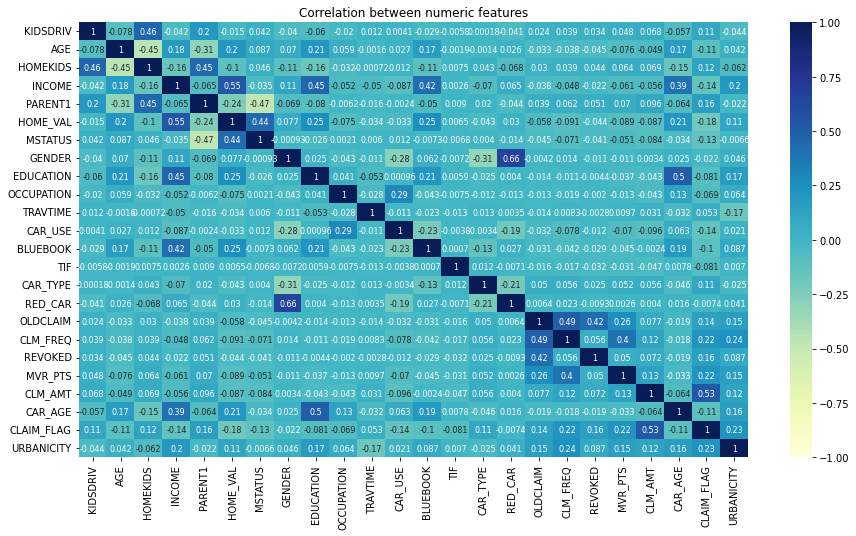

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 8})
plt.title('Correlation between numeric features')
plt.show()

In [ ]:
data2 = new_data.drop(['AGEGROUP'],axis=1)

In [ ]:
data2.head()

,KIDSDRIV,AGE,HOMEKIDS,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
index,,,,,,,,,,,,,,,,,,,,,
1,0,60.0,0,67349.0,0,0.0,0,1,4,6,...,0,1,4461.0,2,0,3,0.0,18.0,0,1
2,0,43.0,0,91449.0,0,257252.0,0,1,2,0,...,0,1,0.0,0,0,0,0.0,1.0,0,1
3,0,48.0,0,52881.0,0,0.0,0,1,1,5,...,5,1,0.0,0,0,2,0.0,10.0,0,1
4,0,35.0,1,16039.0,0,124191.0,1,0,2,1,...,3,0,38690.0,2,0,3,0.0,10.0,0,1
5,0,51.0,0,53529.0,0,306251.0,1,1,0,0,...,0,1,0.0,0,0,0,0.0,6.0,0,1


kNN model

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix  # confusion matrix

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  # importing kNN classifier from neighbors class
metric_k=[] # creating an empty list
neighbors=range(3,18)

for k in neighbors:
  classifier =KNeighborsClassifier(n_neighbors=k)
  classifier=classifier.fit(X_train,y_train)
  y_pred_kNN=classifier.predict(X_test)
  acc=accuracy_score(y_test,y_pred_kNN)
  metric_k.append(acc)

In [ ]:
metric_k

[0.8544395924308588,
 0.8461911693352742,
 0.8486171761280932,
 0.8335759340126152,
 0.8413391557496361,
 0.8311499272197962,
 0.8393983503153809,
 0.8287239204269772,
 0.83163512857836,
 0.8219311014070839,
 0.8262979136341582,
 0.8185346918971373,
 0.8219311014070839,
 0.8112566715186803,
 0.8156234837457544]

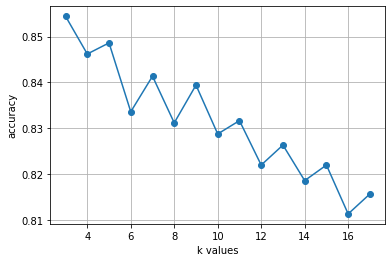

In [ ]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.grid()

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=3)
classifier=classifier.fit(X_train,y_train)
y_pred_kNN=classifier.predict(X_test)

In [ ]:
accscore=accuracy_score(y_test,y_pred_kNN)
print(accscore)

0.8544395924308588


In [ ]:
accuracy_score(y_test,y_pred_kNN)

0.8544395924308588

SVC using linear and rbf kernel

In [ ]:
from sklearn.svm import SVC
clf_svm=SVC(kernel='linear')
clf_svm=clf_svm.fit(X_train,y_train)
y_pred_svm=clf_svm.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_test,y_pred_svm)

array([[1506,    0],
       [   0,  555]])

In [ ]:
accuracy_score(y_test,y_pred_svm)

1.0

In [ ]:
from sklearn.svm import SVC
clf_svm2=SVC(kernel='rbf')
clf_svm2=clf_svm2.fit(X_train,y_train)
y_pred_svm2=clf_svm2.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_test,y_pred_svm2)

array([[1506,    0],
       [ 303,  252]])

In [ ]:
acc_score=accuracy_score(y_test,y_pred_svm)

In [ ]:
accuracy_score(y_test,y_pred_svm2)

0.8529839883551674

RFR- Random Forest Regressor

In [ ]:
# import the regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
# Assign the RandomForestRegressor to rf
rf_regressor = RandomForestRegressor(n_estimators = 10, criterion = 'mse',  random_state = 0, n_jobs = -1)

In [ ]:
# Fit the Model with training data
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(criterion='mse', n_estimators=10, n_jobs=-1,
                      random_state=0)

In [ ]:
# Model Prediction
rf_y_test_pred = rf_regressor.predict(X_test)

In [ ]:
# Evaluate the model
print("Test dataset R-squared score for Random Forest Regressor Model is {}".format(rf_regressor.score(X_test, y_test)))

Test dataset R-squared score for Random Forest Regressor Model is 1.0


In [ ]:
print(metrics.classification_report(rf_y_test_pred, y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1506
         1.0       1.00      1.00      1.00       555

    accuracy                           1.00      2061
   macro avg       1.00      1.00      1.00      2061
weighted avg       1.00      1.00      1.00      2061



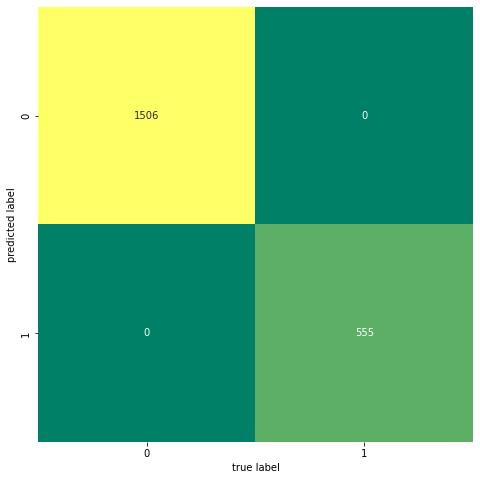

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(16,8))
mat_rf = confusion_matrix(y_test, rf_y_test_pred)
sns.heatmap(mat_rf.T, square=True, annot=True, fmt='d', cbar=False,cmap='summer') 
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# Assign DecisionTreeRegressor to the variable "dt_regressor"
dt_regressor = DecisionTreeRegressor(random_state=0)
# Fit the training data to the model
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
# Predict the results
dt_y_test_pred = dt_regressor.predict(X_test)

In [ ]:
# Evaluate the model
print("Test dataset df_regressor score for Decision Tree Regression Model is {}".format(dt_regressor.score(X_test, y_test)))

Test dataset df_regressor score for Decision Tree Regression Model is 1.0


In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
logit_model=lr.fit(X_train,y_train)
y_pred_logit=logit_model.predict(X_test)

In [ ]:
y_pred_logit

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import precision_score,recall_score,accuracy_score

In [ ]:
precision_score(y_test,y_pred_logit)

1.0

In [ ]:
recall_score(y_test,y_pred_logit)

1.0

In [ ]:
accuracy_score(y_test,y_pred_logit)

1.0

Lazy Predict

It is one of the best python libraries that helps you to semi-automate your Machine Learning Task. It builds a lot of basic models without much code and helps understand which models work better without any parameter tuning.

In [ ]:
pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
### importing lazypredict library
import lazypredict
### importing LazyClassifier for classification problem
from lazypredict.Supervised import LazyClassifier

In [ ]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)

In [ ]:
## fitting data in LazyClassifier
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████| 29/29 [00:24<00:00,  1.19it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 1.00               1.00     1.00      1.00   
BaggingClassifier                  1.00               1.00     1.00      1.00   
XGBClassifier                      1.00               1.00     1.00      1.00   
RandomForestClassifier             1.00               1.00     1.00      1.00   
QuadraticDiscriminantAnalysis      1.00               1.00     1.00      1.00   
LGBMClassifier                     1.00               1.00     1.00      1.00   
DecisionTreeClassifier             1.00               1.00     1.00      1.00   
GaussianNB                         1.00               1.00     1.00      1.00   
PassiveAggressiveClassifier        1.00               1.00     1.00      1.00   
LinearSVC                          1.00               1.00     1.00      1.00   
Perceptron                  

In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,0.04
BaggingClassifier,1.00,1.00,1.00,1.00,0.11
XGBClassifier,1.00,1.00,1.00,1.00,0.65
RandomForestClassifier,1.00,1.00,1.00,1.00,0.78
QuadraticDiscriminantAnalysis,1.00,1.00,1.00,1.00,0.07
LGBMClassifier,1.00,1.00,1.00,1.00,0.25
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.04
GaussianNB,1.00,1.00,1.00,1.00,0.03
PassiveAggressiveClassifier,1.00,1.00,1.00,1.00,0.05


#### Use K Fold Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import svm
best_svm = svm.SVC(kernel='rbf')
a1 = cross_val_score(best_svm, X, y, cv=5)
print(a1)

[0.85346919 0.84813197 0.85097087 0.85631068 0.84902913]


In [ ]:
logreg=LogisticRegression()
predicted = cross_val_score(logit_model, X, y, cv=5)
print(predicted)

[1.         1.         1.         1.         0.99951456]


In [ ]:
# X,y will automatically devided by 5 folder, the scoring I will still use the accuracy
score = cross_val_score(classifier, X, y, cv=5)
# print all 5 times scores 
print(score)

[0.86365842 0.86705483 0.86019417 0.86019417 0.84708738]


In [ ]:
scores = cross_val_score(dt_regressor, X, y, cv=5)
print(scores)

[1. 1. 1. 1. 1.]


In [ ]:
score_reg = cross_val_score(rf_regressor, X, y, cv=5)
print(score_reg)

[1.         1.         1.         1.         0.99959503]


In [ ]:
#Creating a dataframe with all accuracy scores before and after cross valiadtion
accuracy={'Model Name':['Logistic','kNN','SVC-RBF','Decision Tree','Random Forest'],'Accuracy score' :[score.mean(),accscore,acc_score.mean(),score.mean(),score.mean()],'Cross Validation Score':[predicted.mean(),score.mean(),a1.mean(),scores.mean(),score_reg.mean()]}
df4=pd.DataFrame(accuracy)
df4

,Model Name,Accuracy score,Cross Validation Score
0,Logistic,0.86,1.00
1,kNN,0.85,0.86
2,SVC-RBF,1.00,0.85
3,Decision Tree,0.86,1.00
4,Random Forest,0.86,1.00
